## **<center>Notebook Tugas Besar Pengolahan Citra Digital - Klasifikasi Tingkat Kematangan Cabai Berdasarkan Fitur Tekstur dan Warna Menggunakan Algoritma Decision Tree C4.5**
### **<center>Disusun Oleh :** <br> 
### <center> 119140209 - Muhammad Nadhif Athalla <br> 119140009 - Candra Wahyu Firmansyah <br> 119140199 - Muhammad Fariz Luthfi

#### **Tahap 1.** Tugas besar yang dilakukan dalam notebook ini adalah mengindentifikasi tingkat kematangan cabai berdasarkan fitur tekstur dan warna menggunakan algoritma Decision Tree C4.5. Tahapan awal dalam prosesnya adalah memasukkan paket dan kelas library yang dibutuhkan untuk pengolahan data <br><br> **Notes.** Agar notebook ini dapat digunakan secara maksimal dan hasil dari pengolahan data dapat terlihat, silahkan akses tautan folder google drive berikut : https://drive.google.com/drive/folders/1c-uB4hHk4DNwao6_SsZuiPhVV5IV_9it?usp=sharing

In [ ]:
%pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow
from skimage.filters import threshold_otsu
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.feature import greycomatrix, greycoprops
from PIL import Image, ImageOps

In [4]:
# Menghubungkan google drive dengan google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Menampilkan salah satu citra cabai matang
path = '/content/drive/MyDrive/TubesPCD/Gambar Original/Cabai Matang/Cabai Matang 1.jpg'
img = cv.imread(path)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

#### **Tahap 2.** Tahapan selanjutnya adalah melakukan thresholding dan segmentasi pada masing-masing citra, serta menyimpan hasil dari thresholding dan segmentasi citra tersebut pada folder di dalam google drive

##### **Segmentasi Cabai Matang**

In [ ]:
folder_cabai_matang = glob.glob('/content/drive/MyDrive/TubesPCD/Gambar Original/Cabai Matang/*')

list_img_cabai_matang = []

for img in folder_cabai_matang :
  #Membaca data citra
  img_read = cv.imread(img)
  #Melakukan resize data citra
  img_resize = cv.resize(img_read,(300, 300))
  #Menambahkan citra
  list_img_cabai_matang.append(img_resize)

In [ ]:
#Melakukan segmentasi pada cabai matang
hasil_segmentasi_cabai_matang = []
hasil_mask_cabai_matang = []

for img in list_img_cabai_matang :
  #Mengubah warna RGB(Red, Blue, Green) ke HSV(Hue, Saturation, Value)
  img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  #Mendeklarasikan nilai batas atas dan bawah dari suatu warna yang akan dicari
  lower_img_color = np.array([0,150,50])
  upper_img_color = np.array([255,255,255])
  #Melakukan Threshold pada gambar yang telah diubah ke HSV untuk mendapatkan warna yang diinginkan
  mask = cv.inRange(img_hsv, lower_img_color, upper_img_color)
  #Mendefinisikan ukuran kernel
  kernel = np.ones((7,7),np.uint8)
  #Melakukan transformasi morfologi erosi yang diikuti dengan dilatasi
  mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
  #Melakukan transformasi morfologi dilatasi yang diikuti erosi
  mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
  #Melakukan penggabungan antara gambar asli dengan mask yang telah dibuat menggunakan bantuan Bitwise-And
  result = cv.bitwise_and(img,img, mask=mask)

  hasil_mask_cabai_matang.append(mask)
  hasil_segmentasi_cabai_matang.append(result)

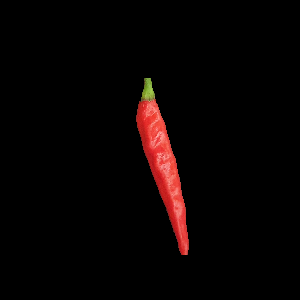

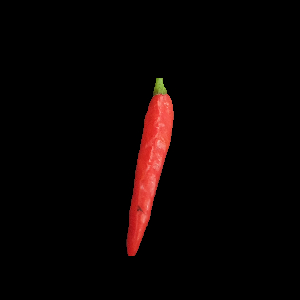

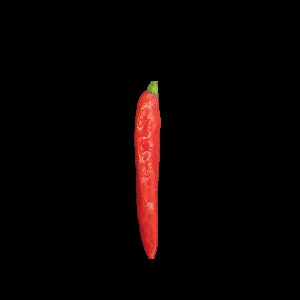

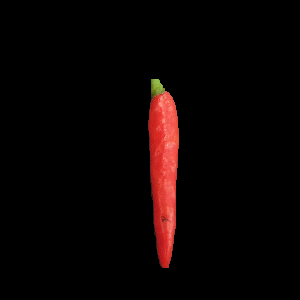

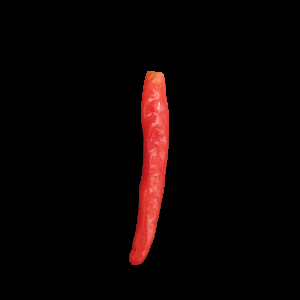

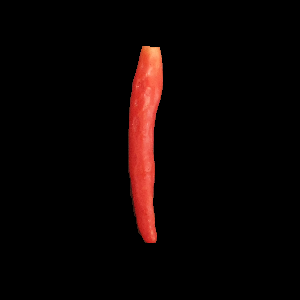

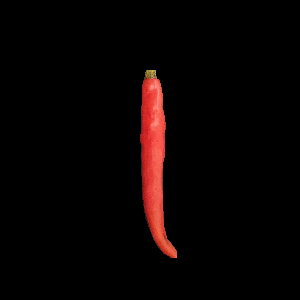

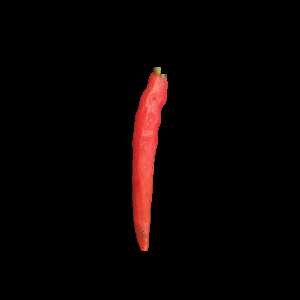

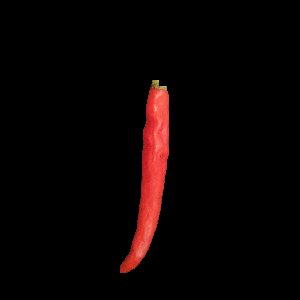

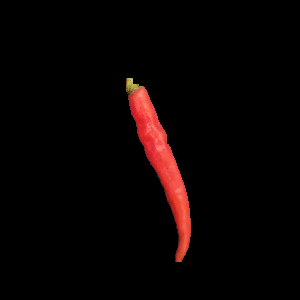

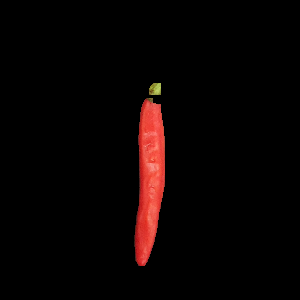

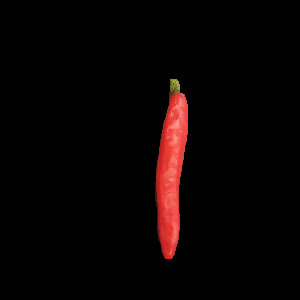

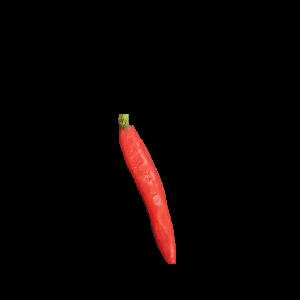

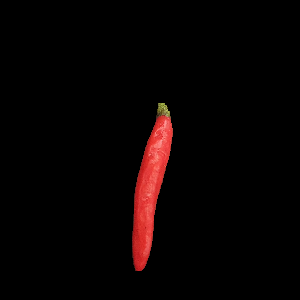

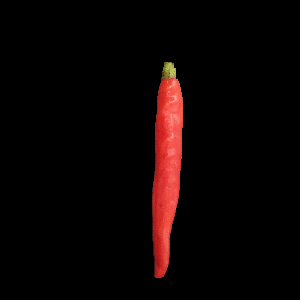

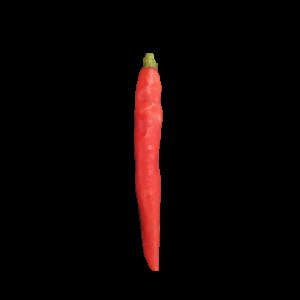

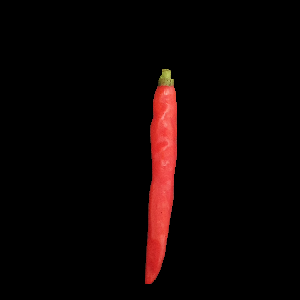

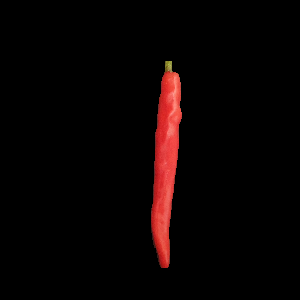

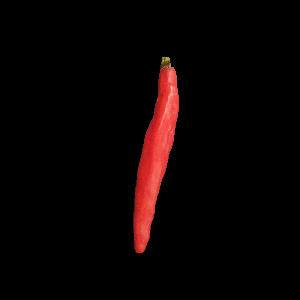

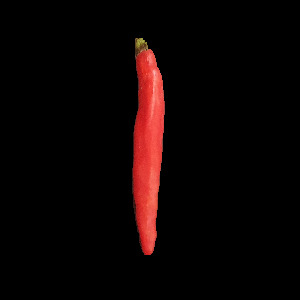

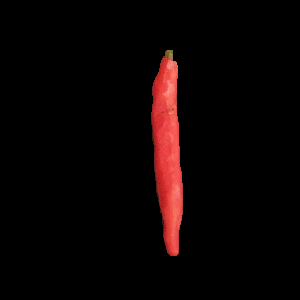

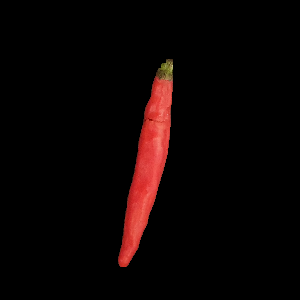

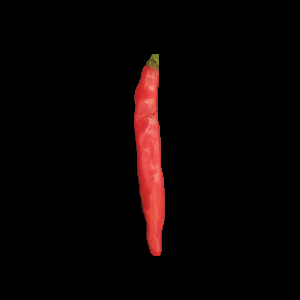

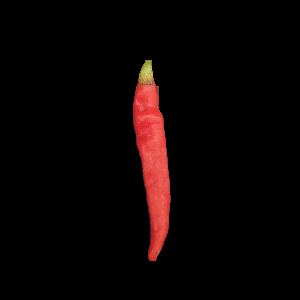

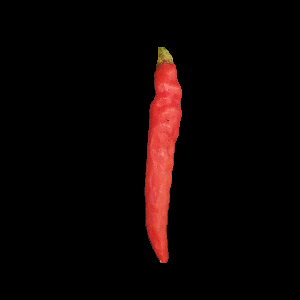

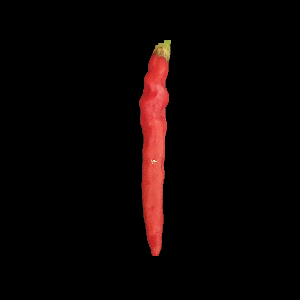

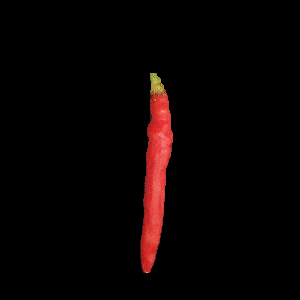

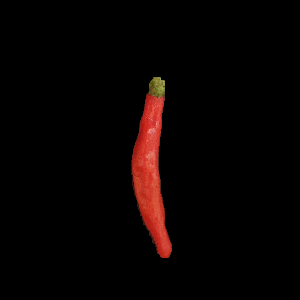

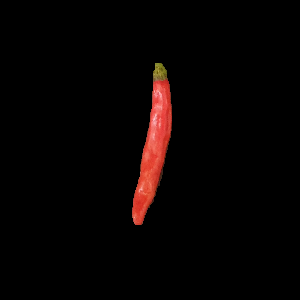

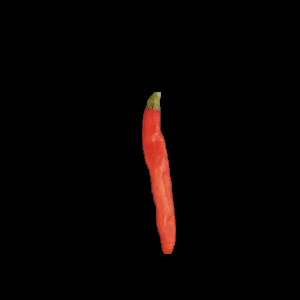

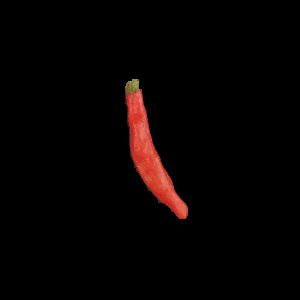

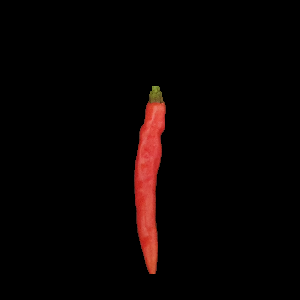

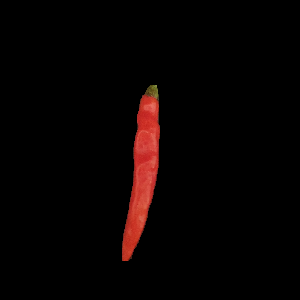

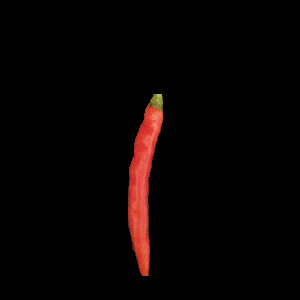

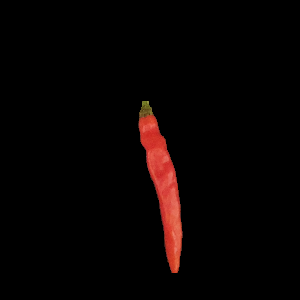

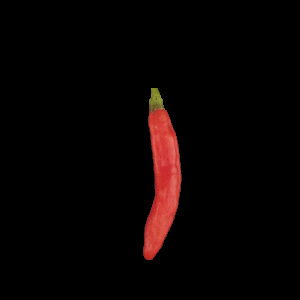

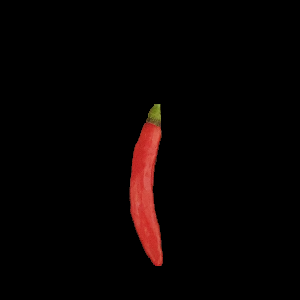

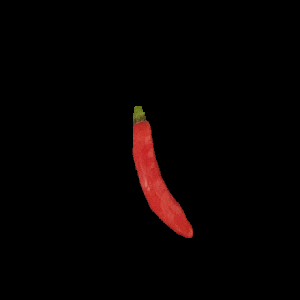

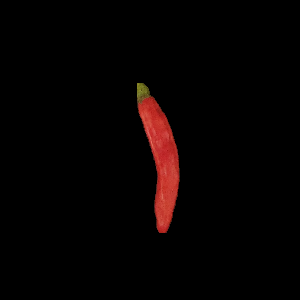

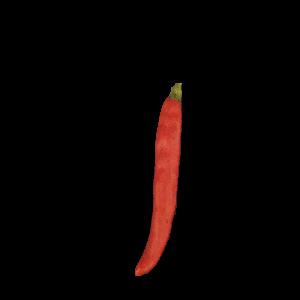

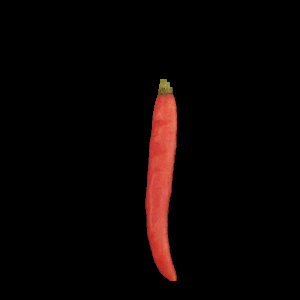

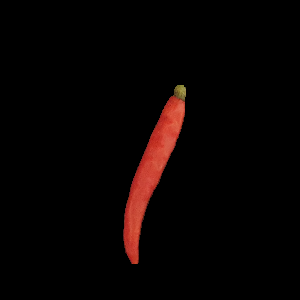

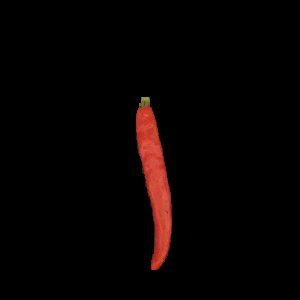

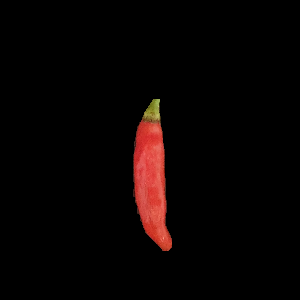

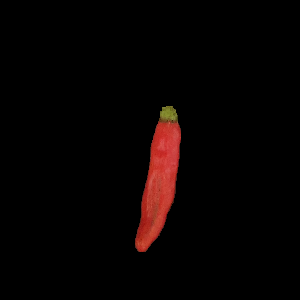

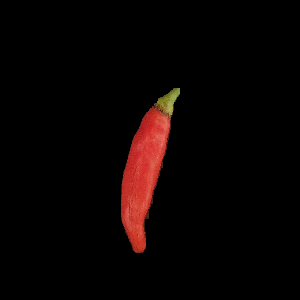

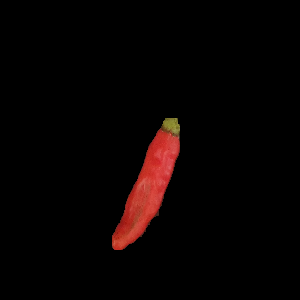

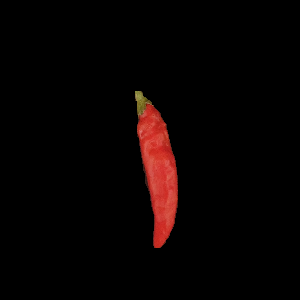

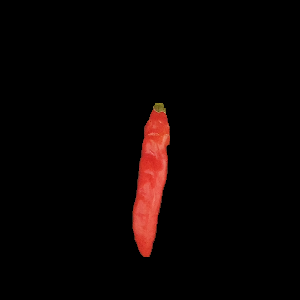

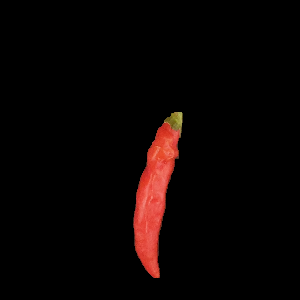

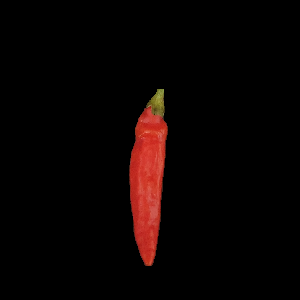

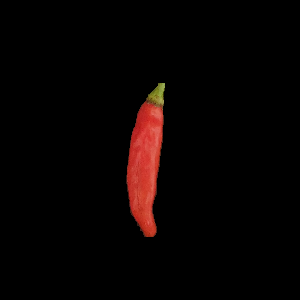

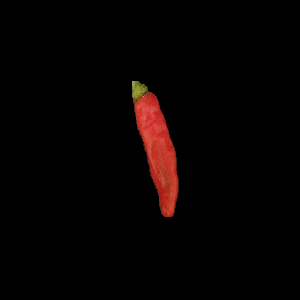

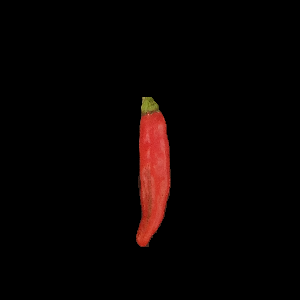

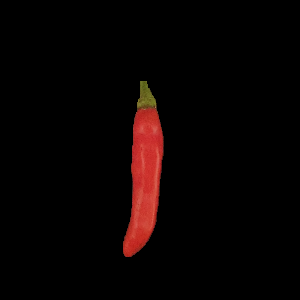

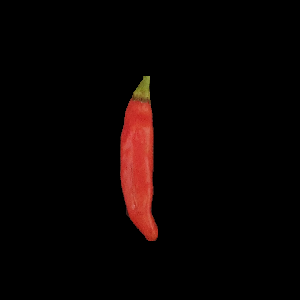

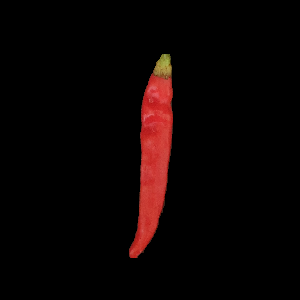

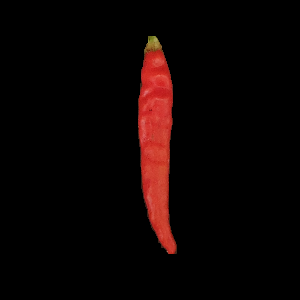

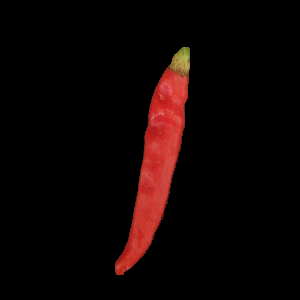

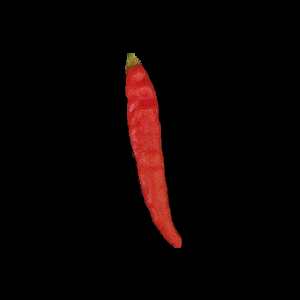

In [ ]:
for i in range(len(hasil_segmentasi_cabai_matang)):
  cv2_imshow(hasil_segmentasi_cabai_matang[i])

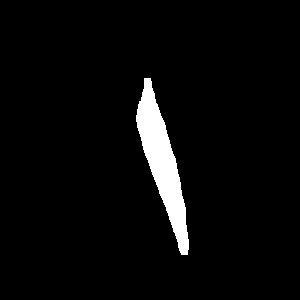

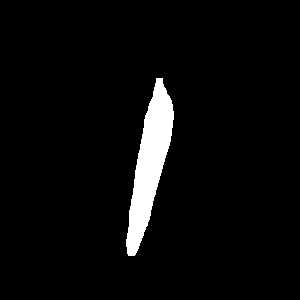

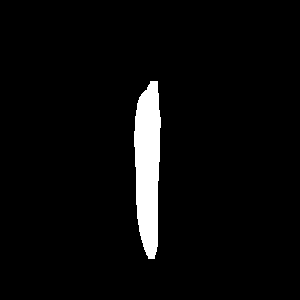

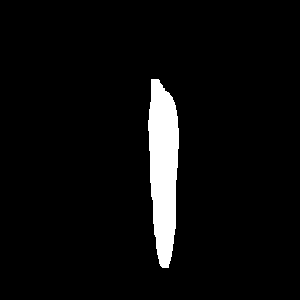

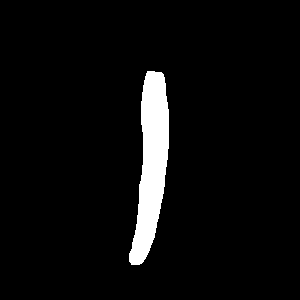

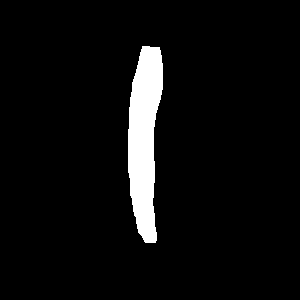

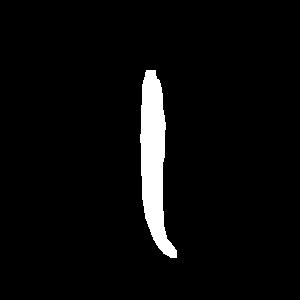

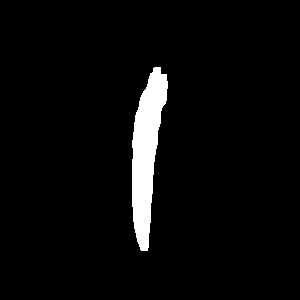

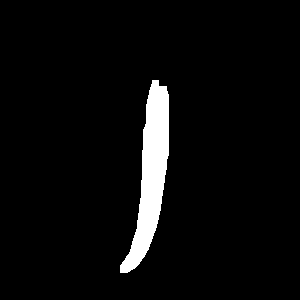

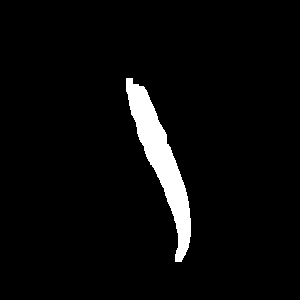

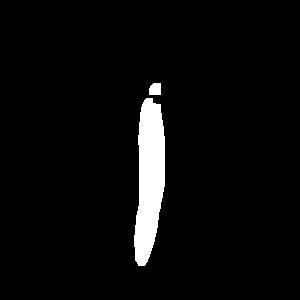

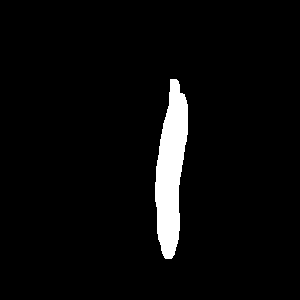

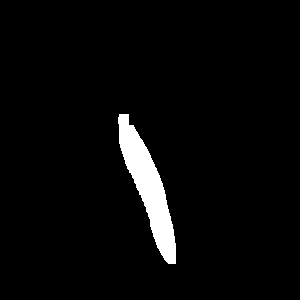

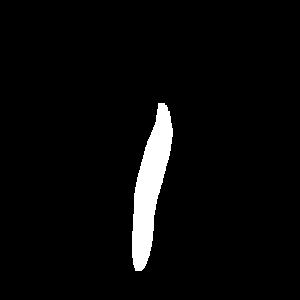

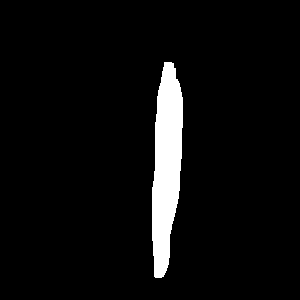

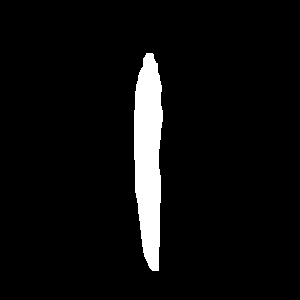

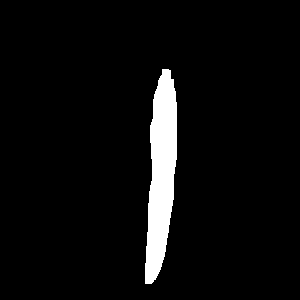

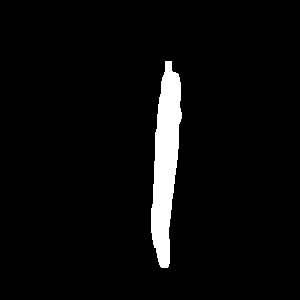

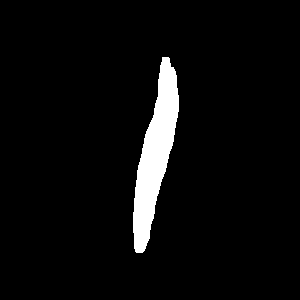

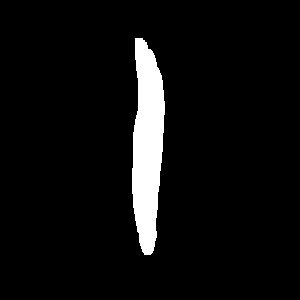

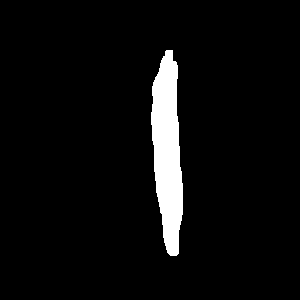

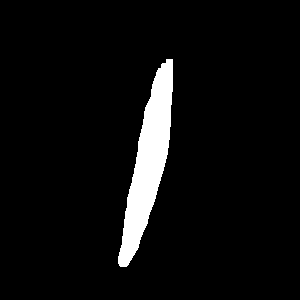

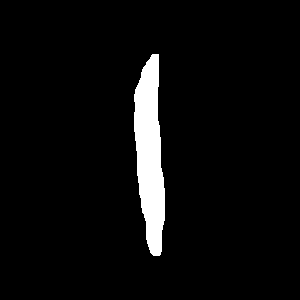

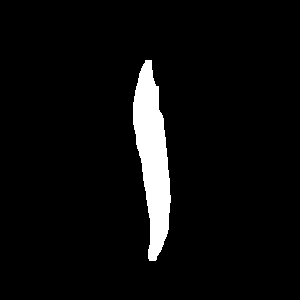

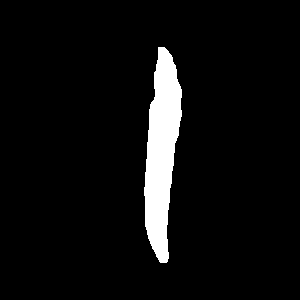

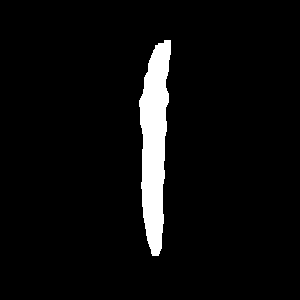

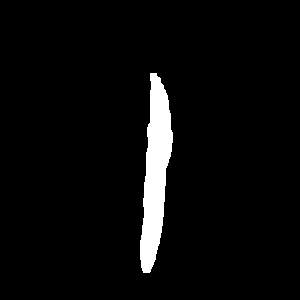

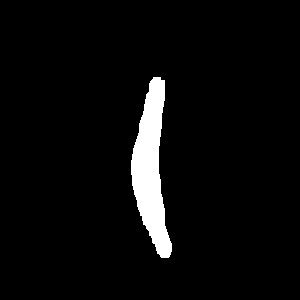

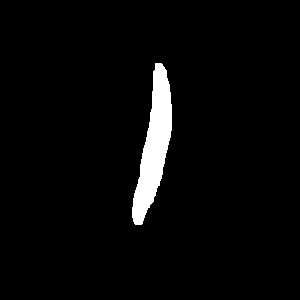

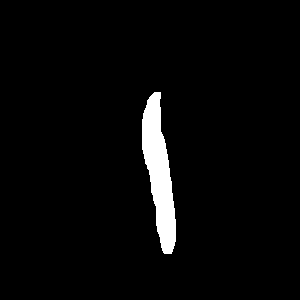

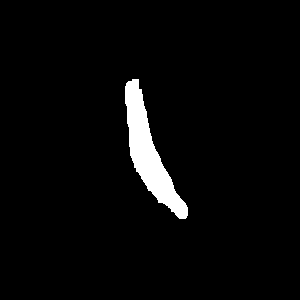

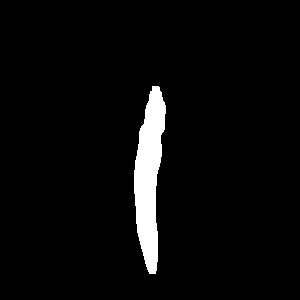

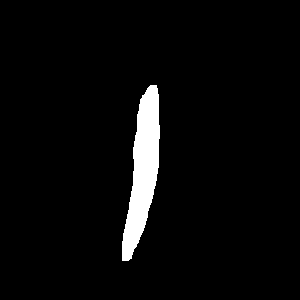

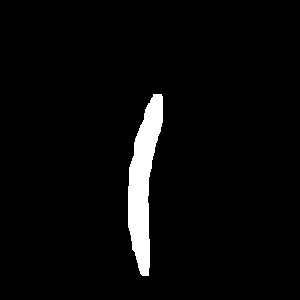

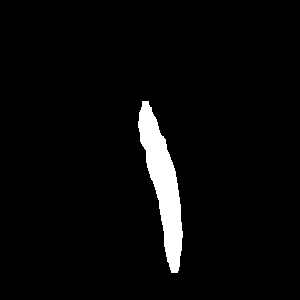

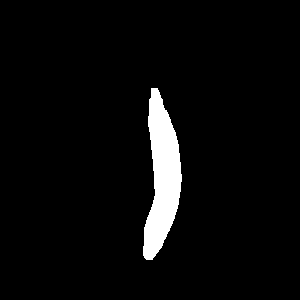

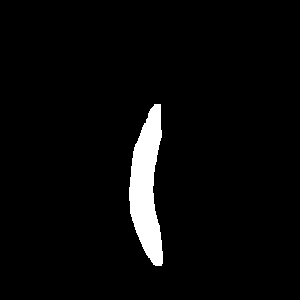

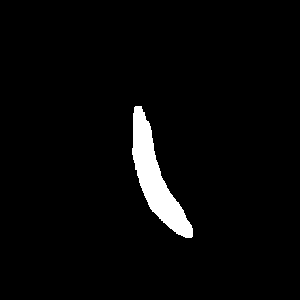

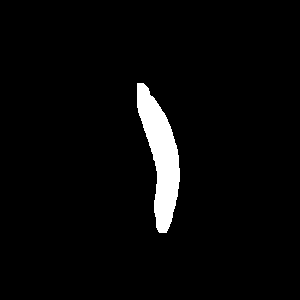

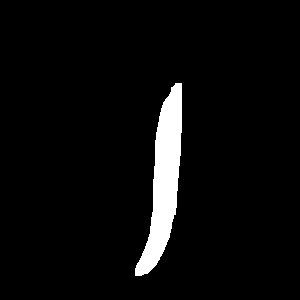

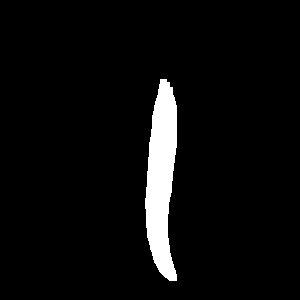

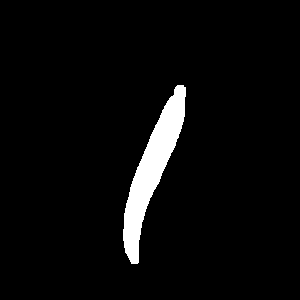

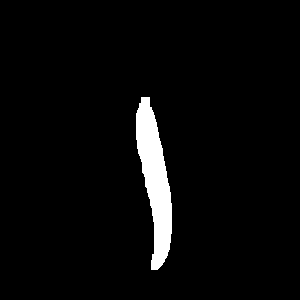

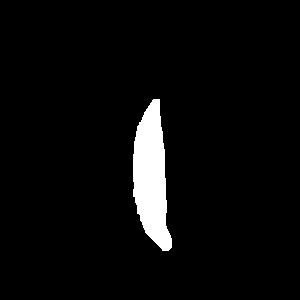

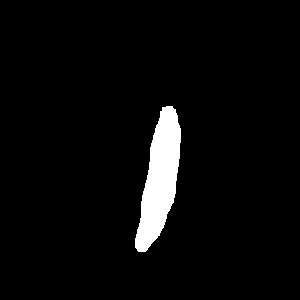

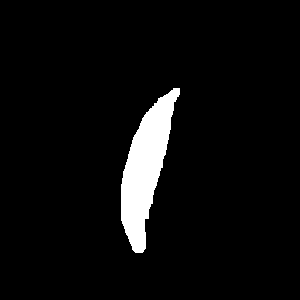

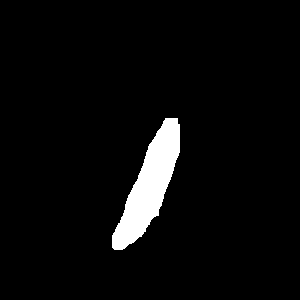

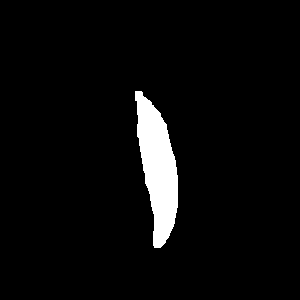

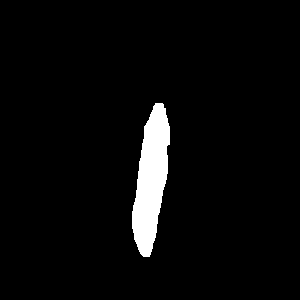

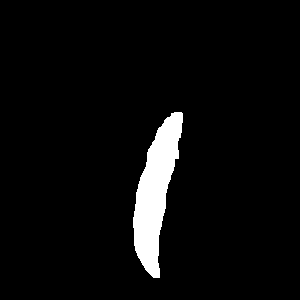

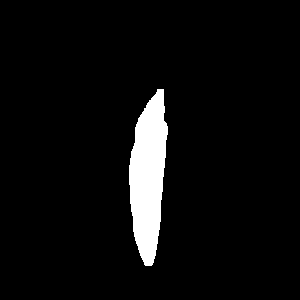

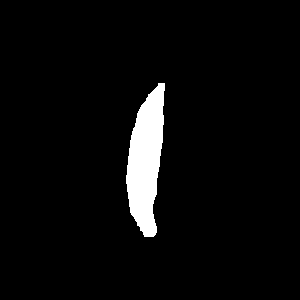

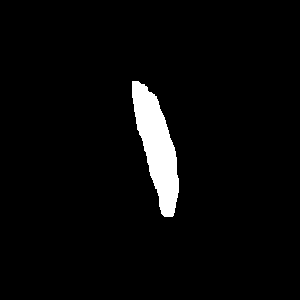

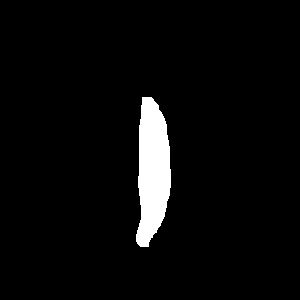

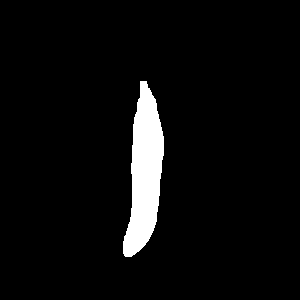

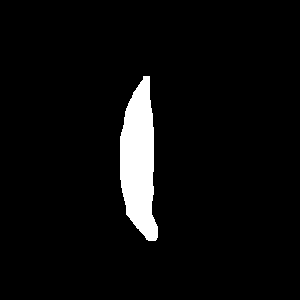

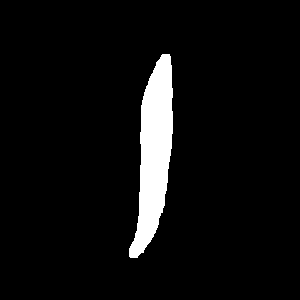

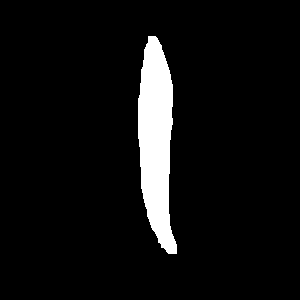

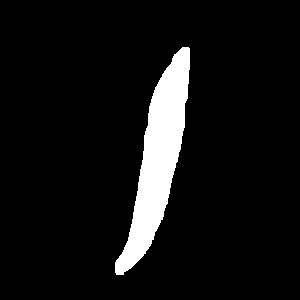

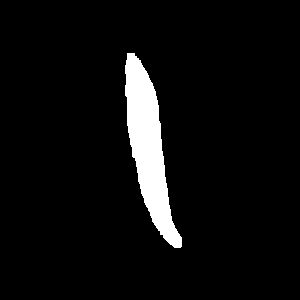

In [ ]:
for i in range(len(hasil_mask_cabai_matang)):
  cv2_imshow(hasil_mask_cabai_matang[i])

##### **Segmentasi Cabai Setengah Matang**

In [ ]:
folder_cabai_set_matang = glob.glob('/content/drive/MyDrive/TubesPCD/Gambar Original/Cabai Setengah Matang/*')

list_img_cabai_set_matang = []

for img in folder_cabai_set_matang :
  #Membaca data citra
  img_read = cv.imread(img)
  #Melakukan resize data citra
  img_resize = cv.resize(img_read,(300, 300))
  #Menambahkan citra
  list_img_cabai_set_matang.append(img_resize)

In [ ]:
#Melakukan segmentasi pada cabai setengah matang
hasil_segmentasi_cabai_set_matang = []
hasil_mask_cabai_set_matang = []

for img in list_img_cabai_set_matang :
  #Mengubah warna RGB(Red, Blue, Green) ke HSV(Hue, Saturation, Value)
  img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  #Mendeklarasikan nilai batas atas dan bawah dari suatu warna yang akan dicari
  lower_img_color = np.array([0,123,50])
  upper_img_color = np.array([255,255,255])
  #Melakukan Threshold pada gambar yang telah diubah ke HSV untuk mendapatkan warna yang diinginkan
  mask = cv.inRange(img_hsv, lower_img_color, upper_img_color)
  #Mendefinisikan ukuran kernel
  kernel = np.ones((7,7),np.uint8)
  #Melakukan transformasi morfologi erosi yang diikuti dengan dilatasi
  mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
  #Melakukan transformasi morfologi dilatasi yang diikuti erosi
  mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
  #Melakukan penggabungan antara gambar asli dengan mask yang telah dibuat menggunakan bantuan Bitwise-And
  result = cv.bitwise_and(img,img, mask=mask)

  hasil_mask_cabai_set_matang.append(mask)
  hasil_segmentasi_cabai_set_matang.append(result)

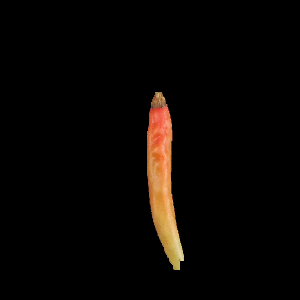

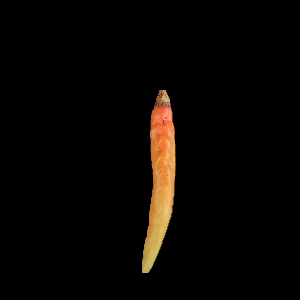

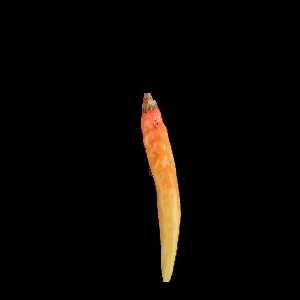

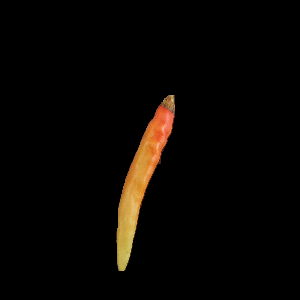

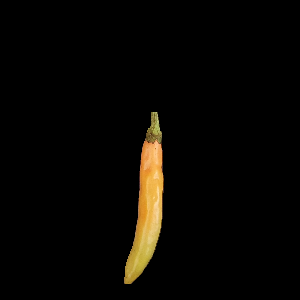

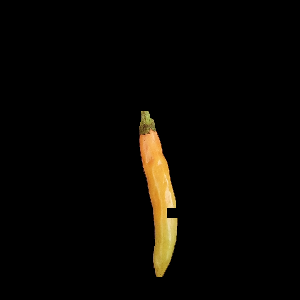

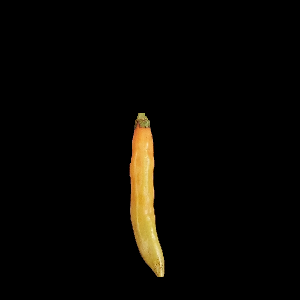

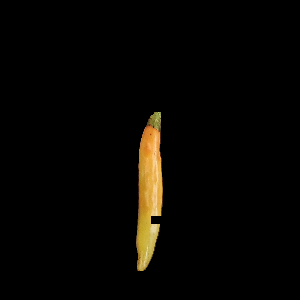

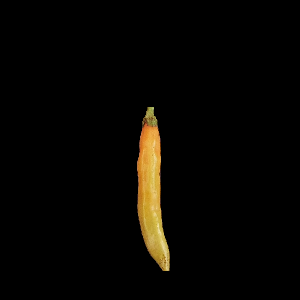

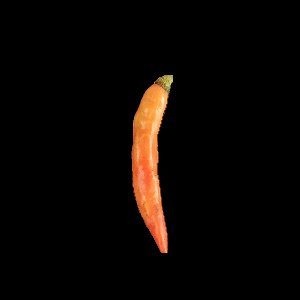

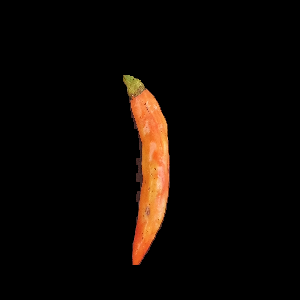

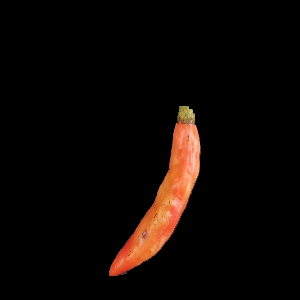

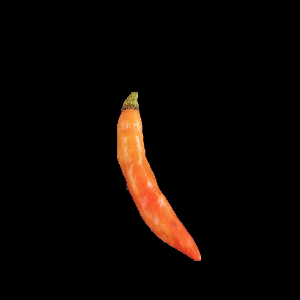

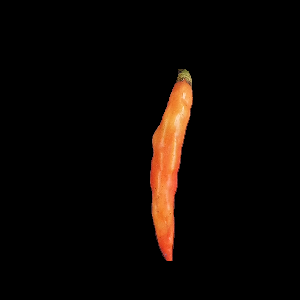

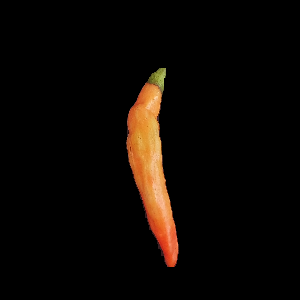

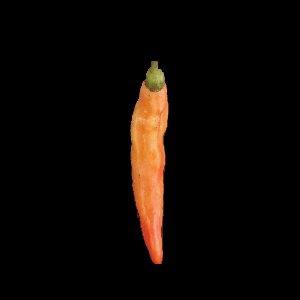

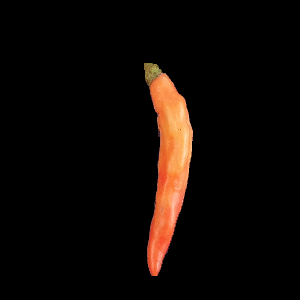

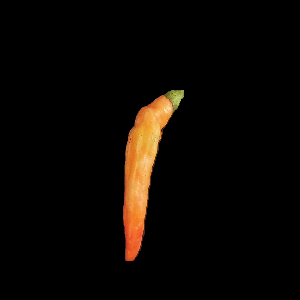

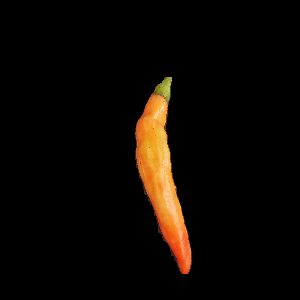

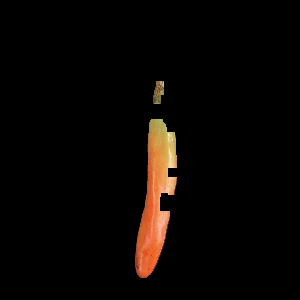

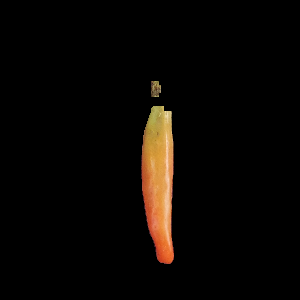

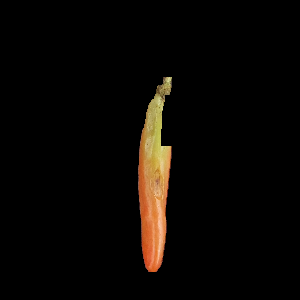

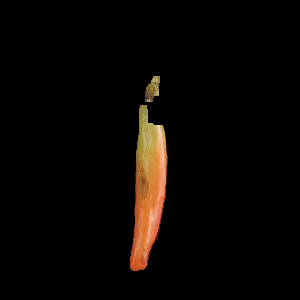

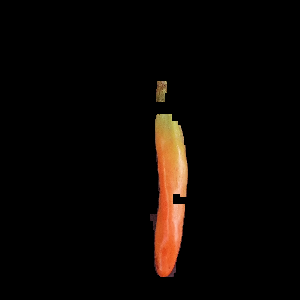

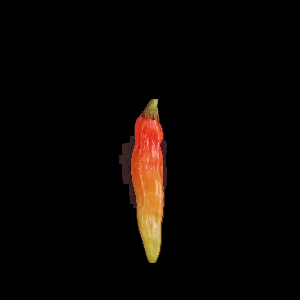

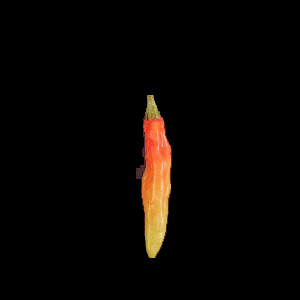

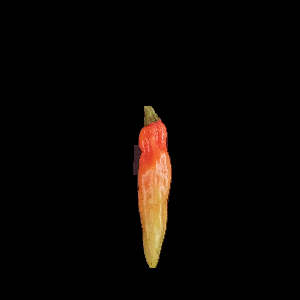

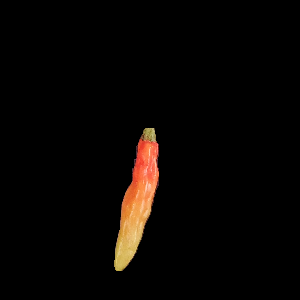

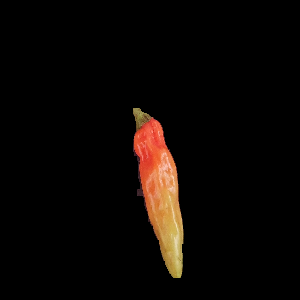

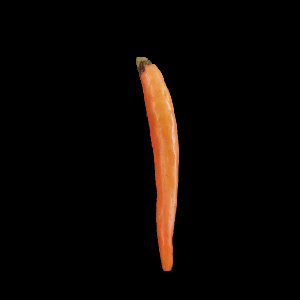

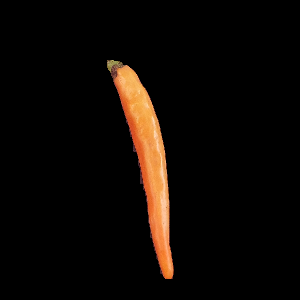

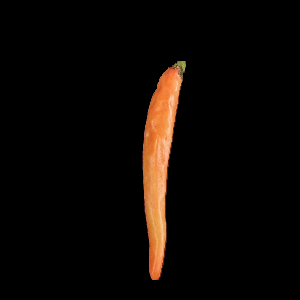

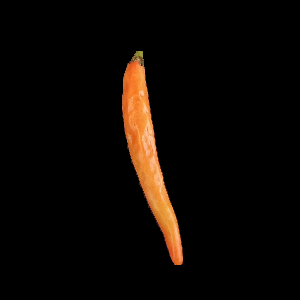

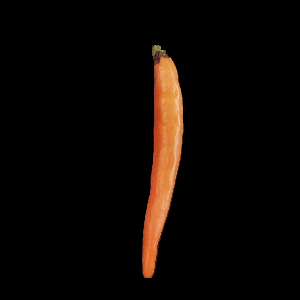

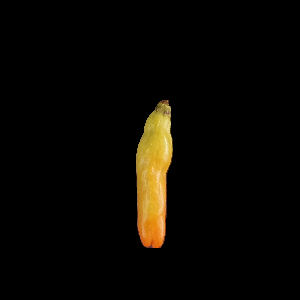

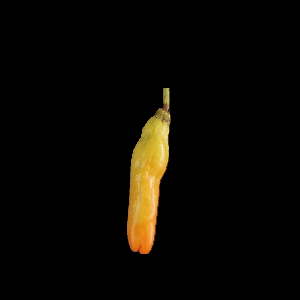

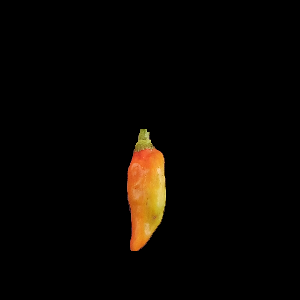

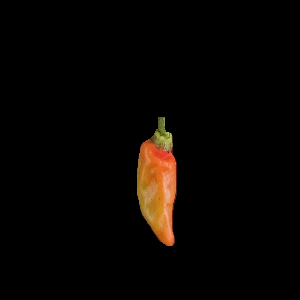

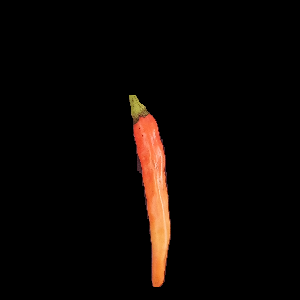

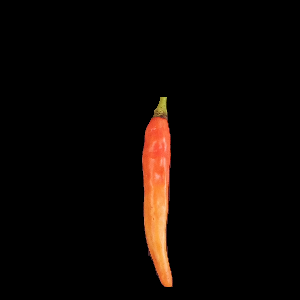

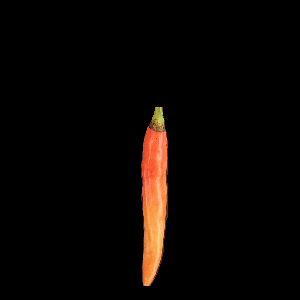

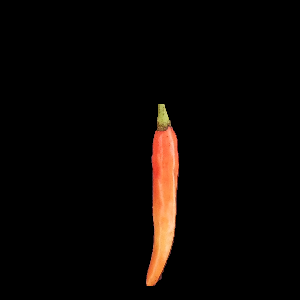

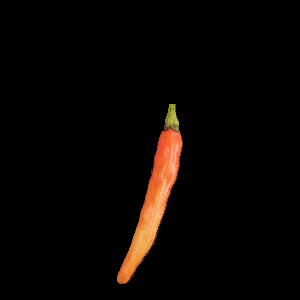

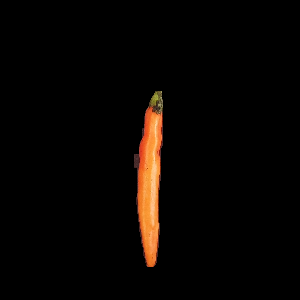

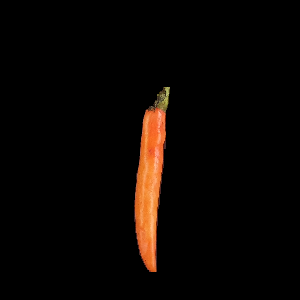

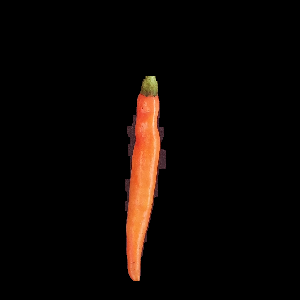

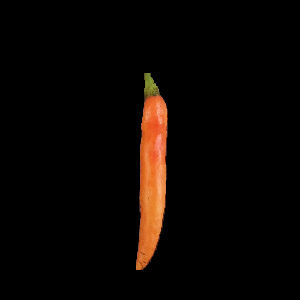

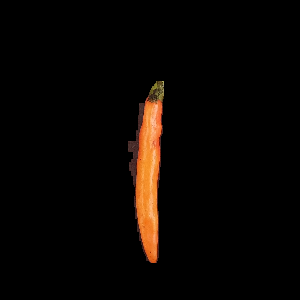

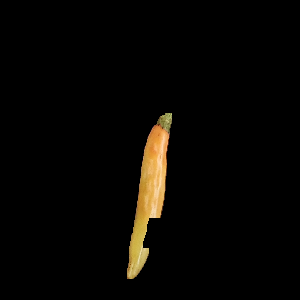

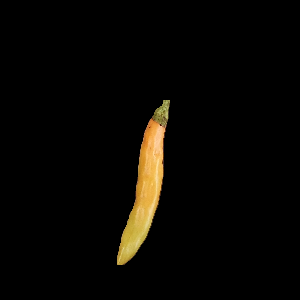

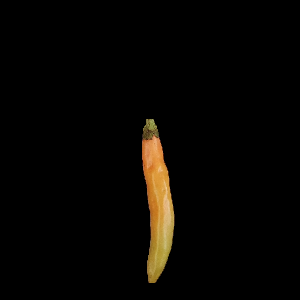

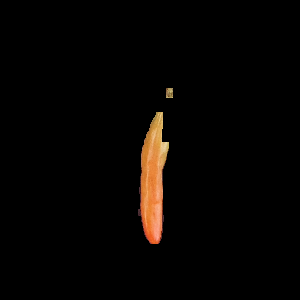

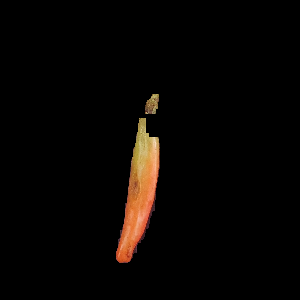

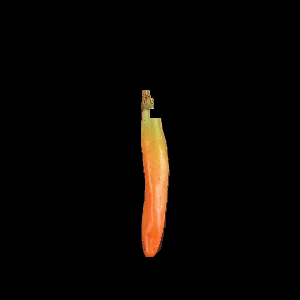

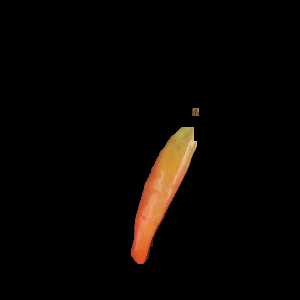

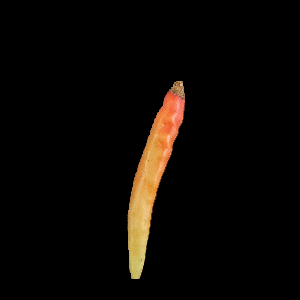

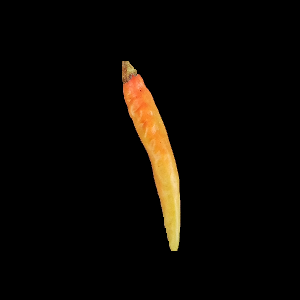

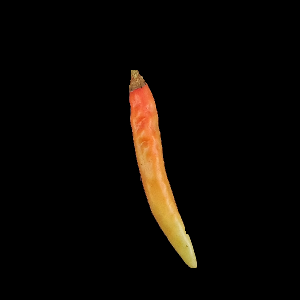

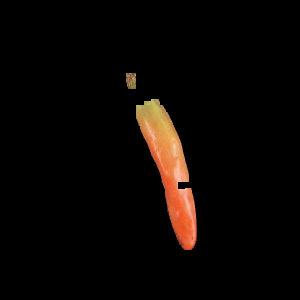

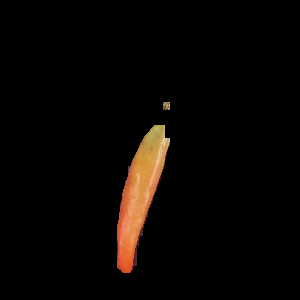

In [ ]:
for i in range(len(hasil_segmentasi_cabai_set_matang)):
  cv2_imshow(hasil_segmentasi_cabai_set_matang[i])

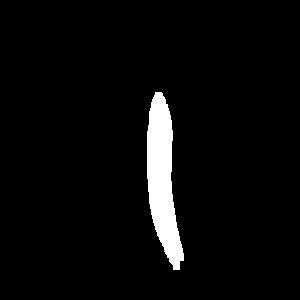

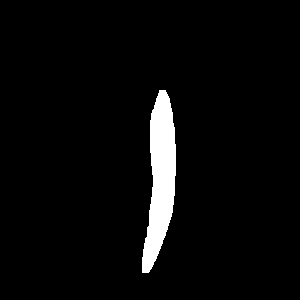

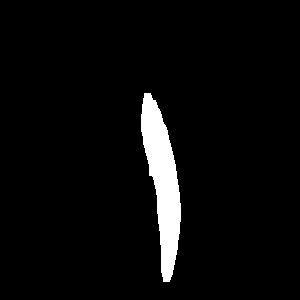

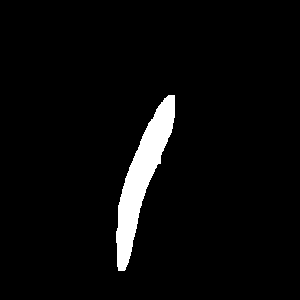

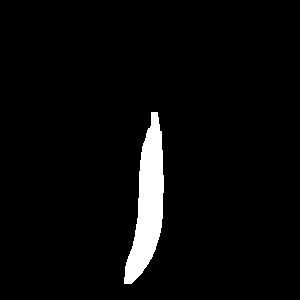

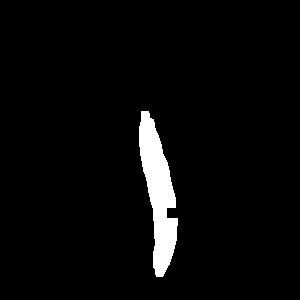

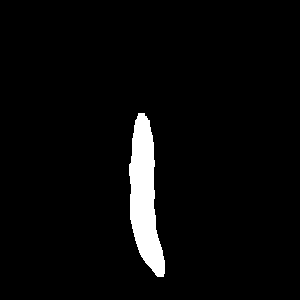

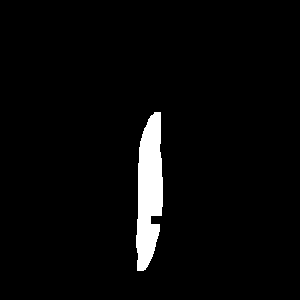

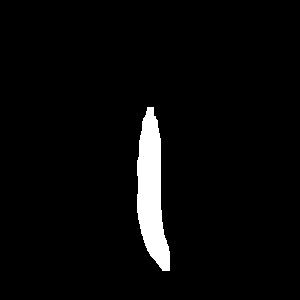

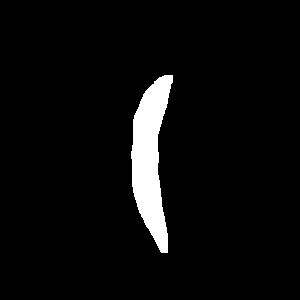

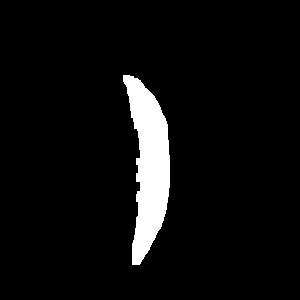

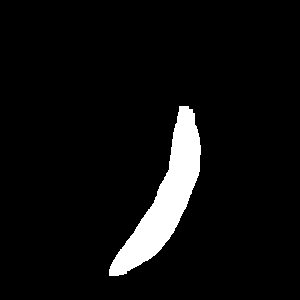

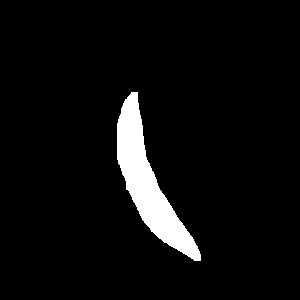

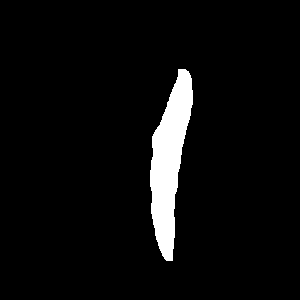

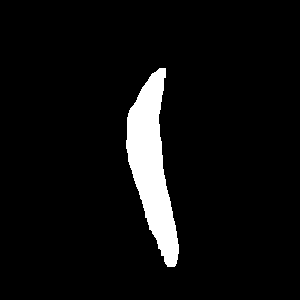

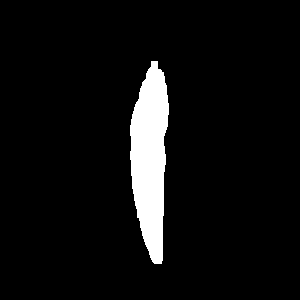

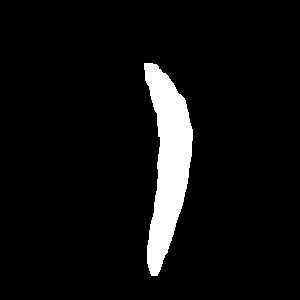

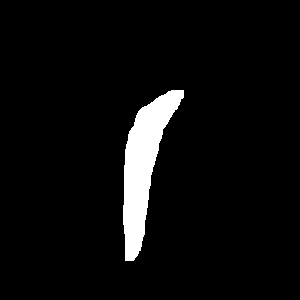

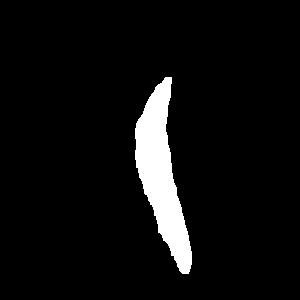

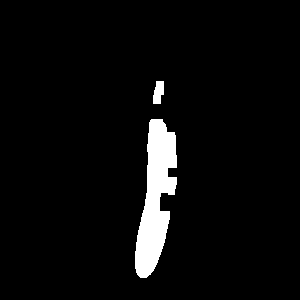

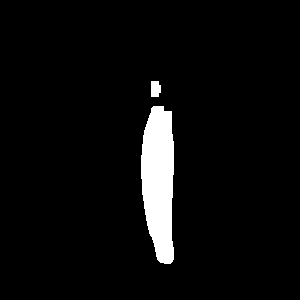

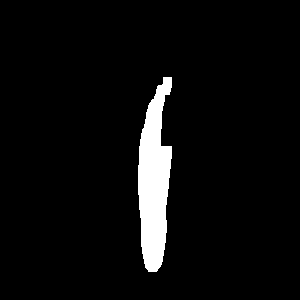

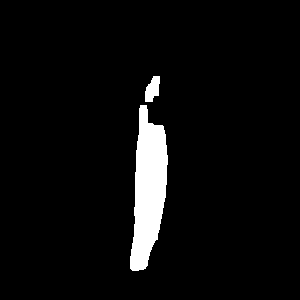

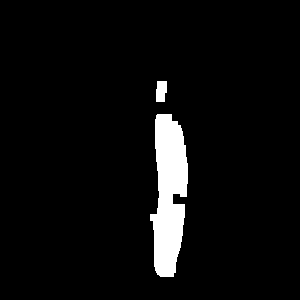

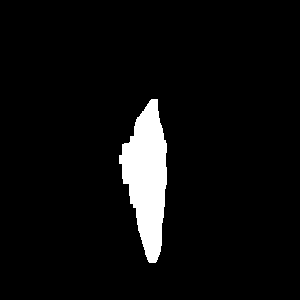

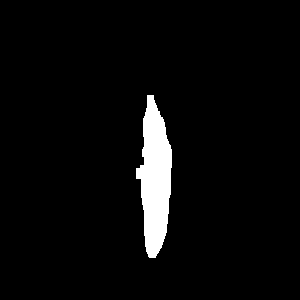

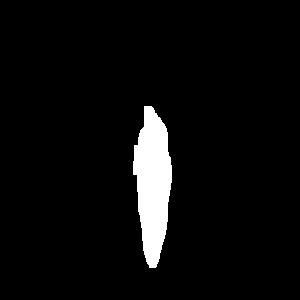

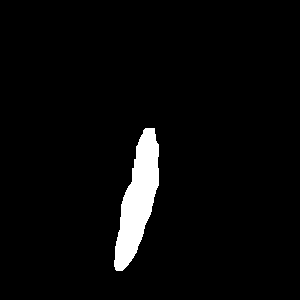

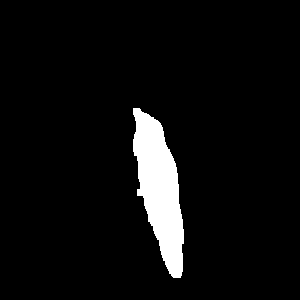

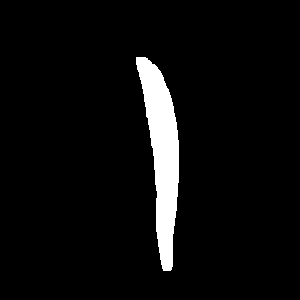

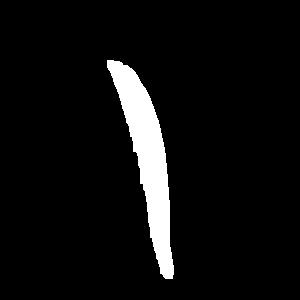

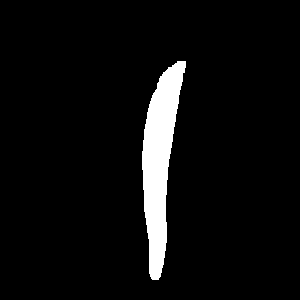

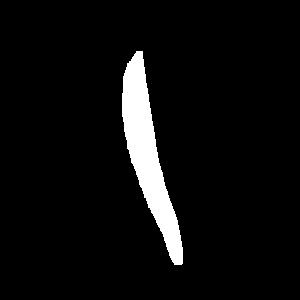

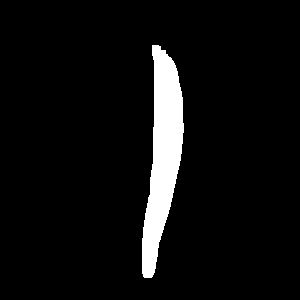

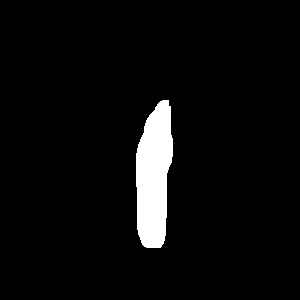

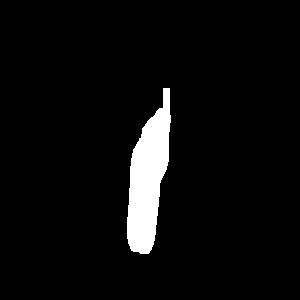

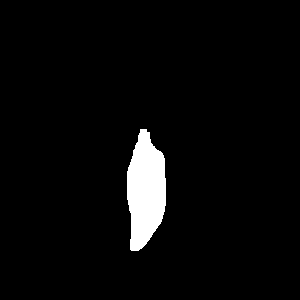

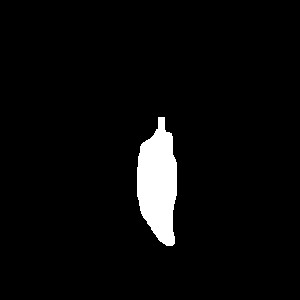

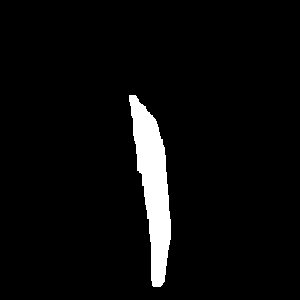

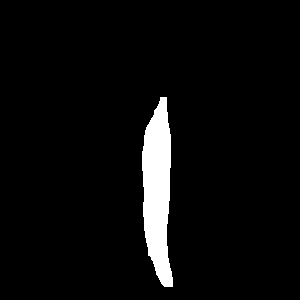

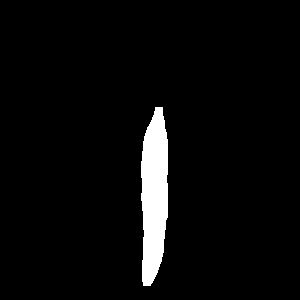

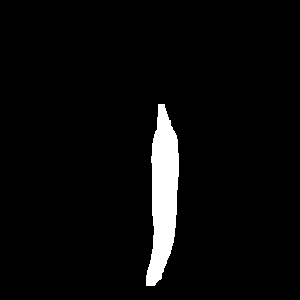

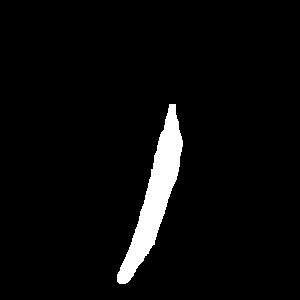

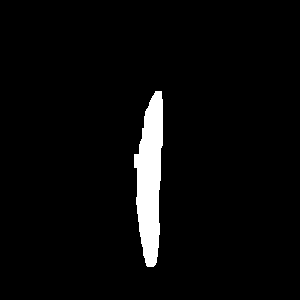

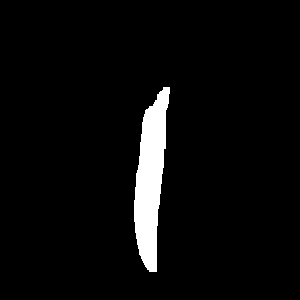

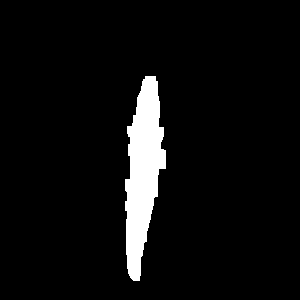

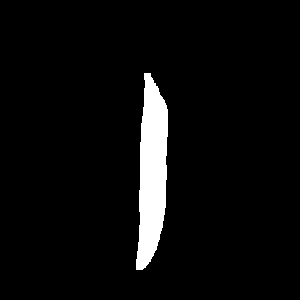

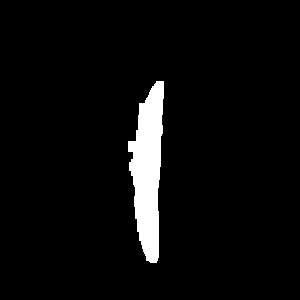

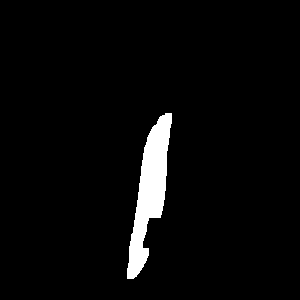

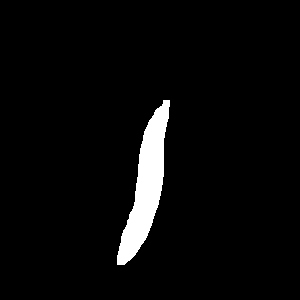

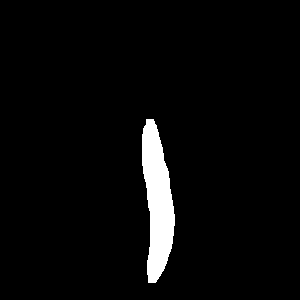

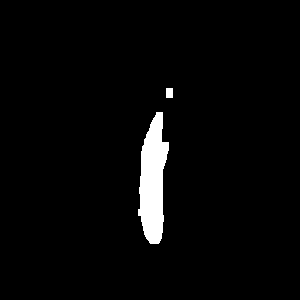

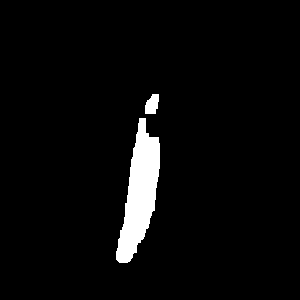

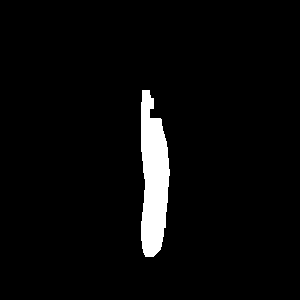

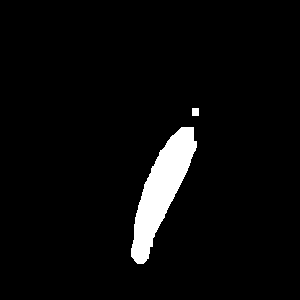

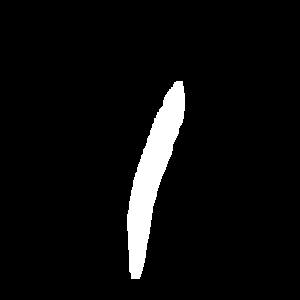

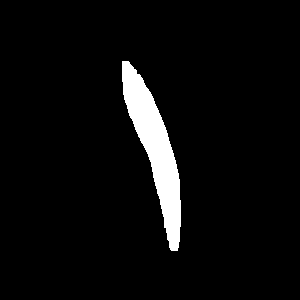

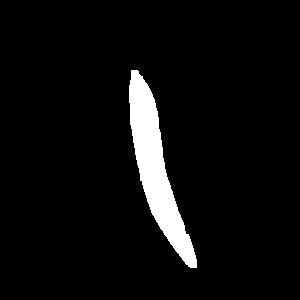

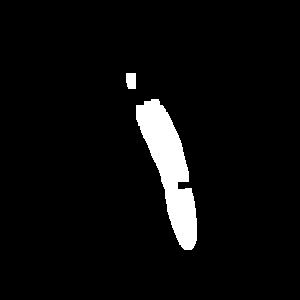

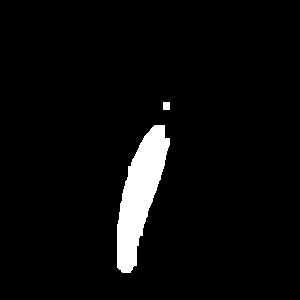

In [ ]:
for i in range(len(hasil_mask_cabai_set_matang)):
  cv2_imshow(hasil_mask_cabai_set_matang[i])

##### **Segmentasi Cabai Mentah**

In [ ]:
folder_cabai_mentah = glob.glob('/content/drive/MyDrive/TubesPCD/Gambar Original/Cabai Mentah/*')

list_img_cabai_mentah = []

for img in folder_cabai_mentah :
  #Membaca data citra
  img_read = cv.imread(img)
  #Melakukan resize data citra
  img_resize = cv.resize(img_read,(300, 300))
  #Menambahkan citra
  list_img_cabai_mentah.append(img_resize)

In [ ]:
#Melakukan segmentasi pada cabai mentah
hasil_segmentasi_cabai_mentah = []
hasil_mask_cabai_mentah = []

for img in list_img_cabai_mentah :
  #Mengubah warna RGB(Red, Blue, Green) ke HSV(Hue, Saturation, Value)
  img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  #Mendeklarasikan nilai batas atas dan bawah dari suatu warna yang akan dicari
  lower_img_color = np.array([22,85,20])
  upper_img_color = np.array([255,255,255])
  #Melakukan Threshold pada gambar yang telah diubah ke HSV untuk mendapatkan warna yang diinginkan
  mask = cv.inRange(img_hsv, lower_img_color, upper_img_color)
  #Mendefinisikan ukuran kernel
  kernel = np.ones((7,7),np.uint8)
  #Melakukan transformasi morfologi erosi yang diikuti dengan dilatasi
  mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
  #Melakukan transformasi morfologi dilatasi yang diikuti erosi
  mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
  #Melakukan penggabungan antara gambar asli dengan mask yang telah dibuat menggunakan bantuan Bitwise-And
  result = cv.bitwise_and(img,img, mask=mask)

  hasil_segmentasi_cabai_mentah.append(result)
  hasil_mask_cabai_mentah.append(mask)

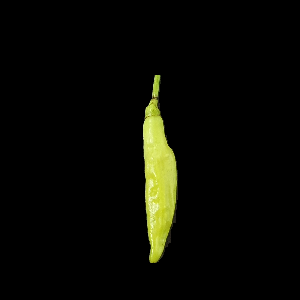

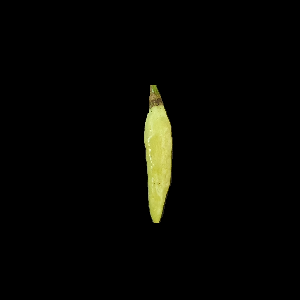

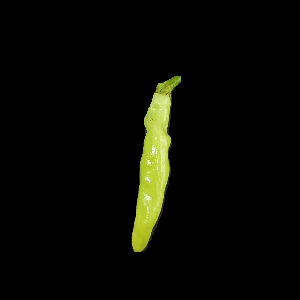

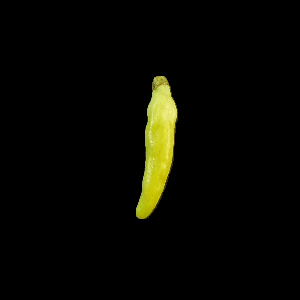

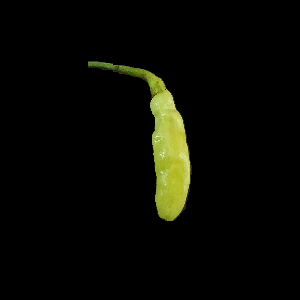

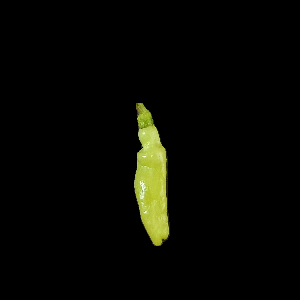

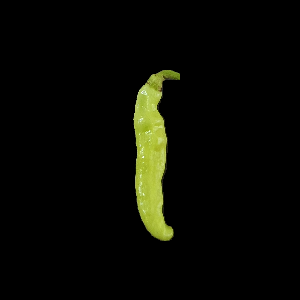

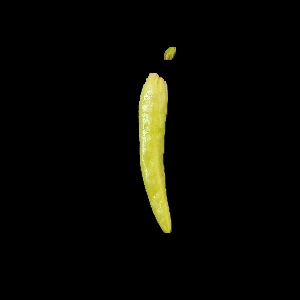

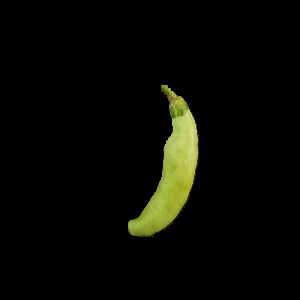

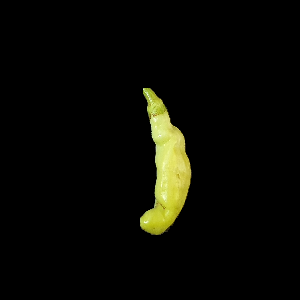

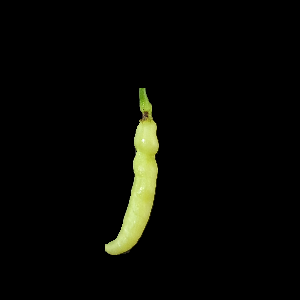

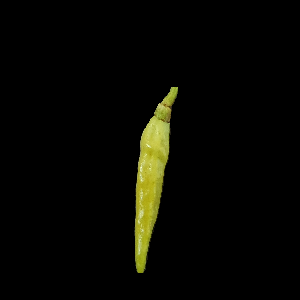

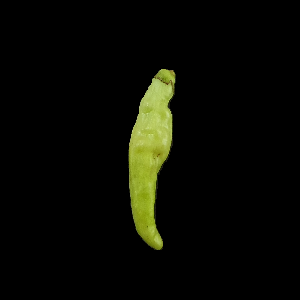

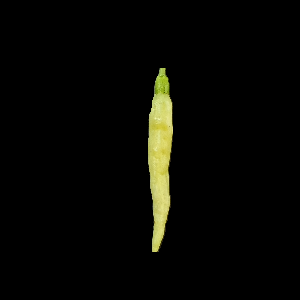

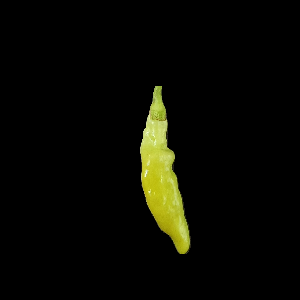

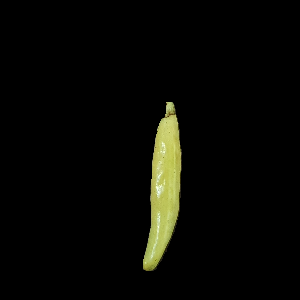

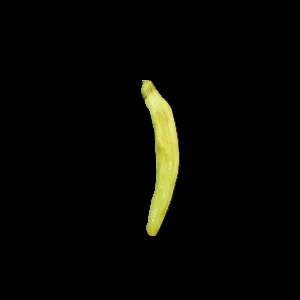

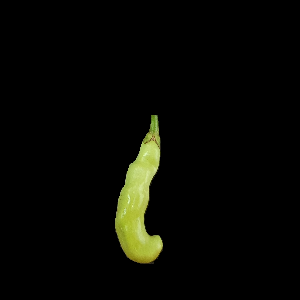

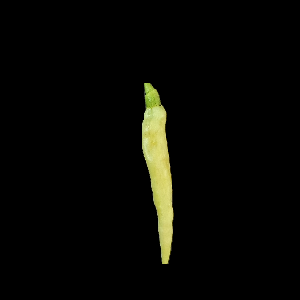

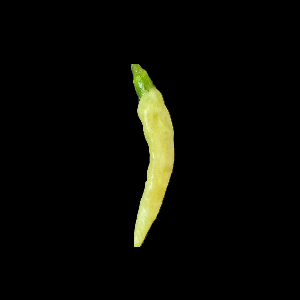

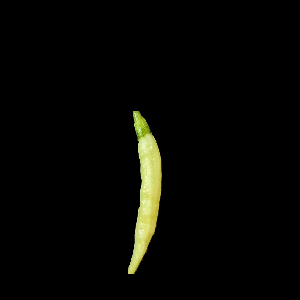

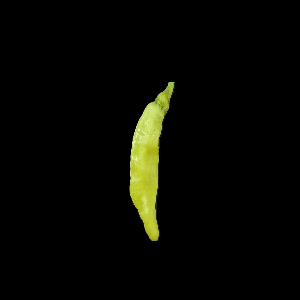

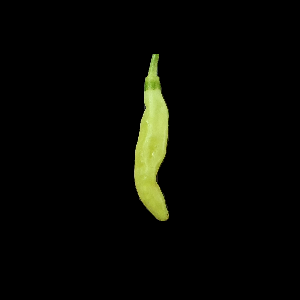

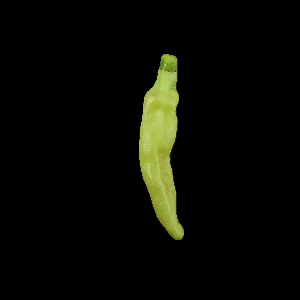

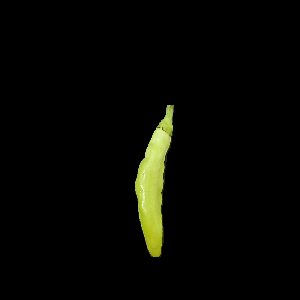

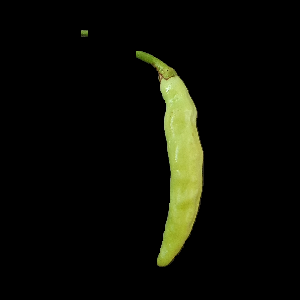

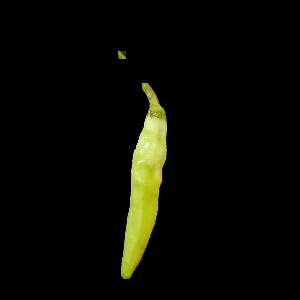

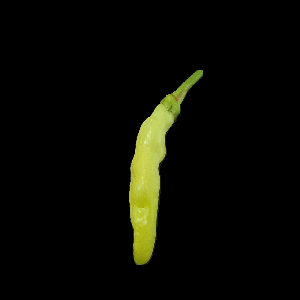

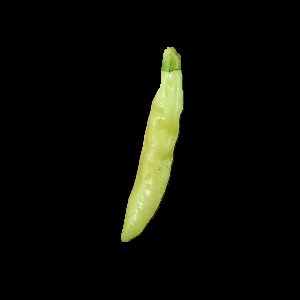

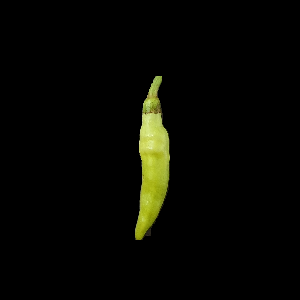

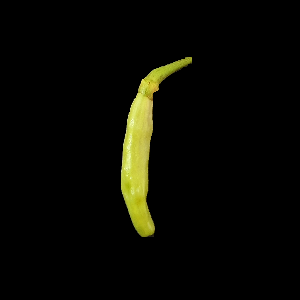

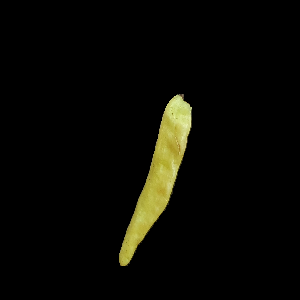

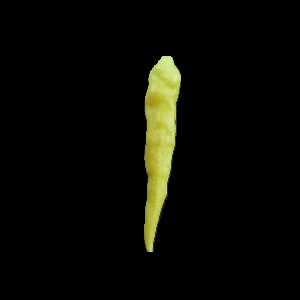

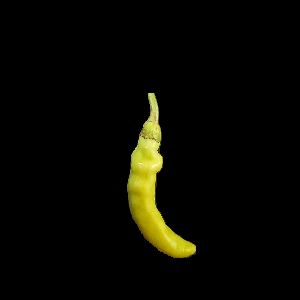

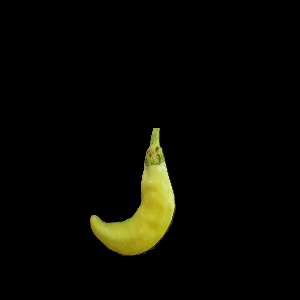

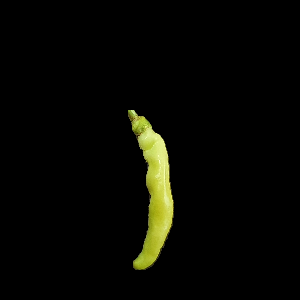

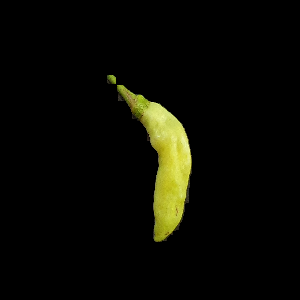

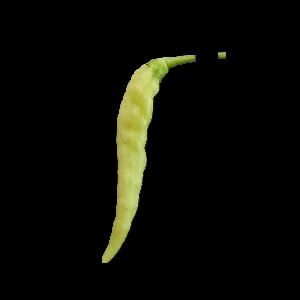

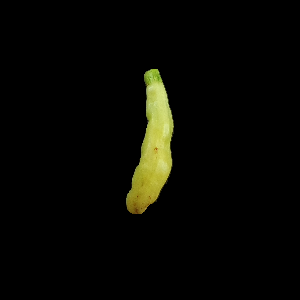

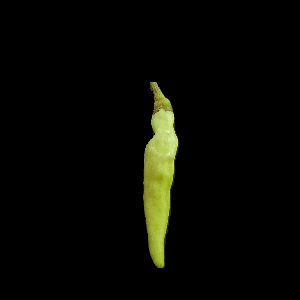

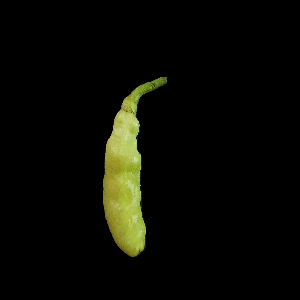

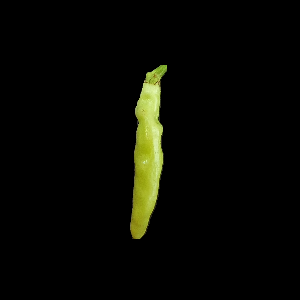

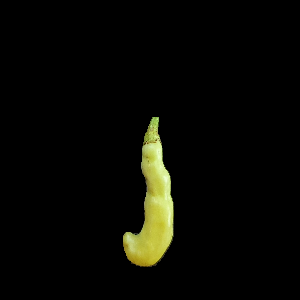

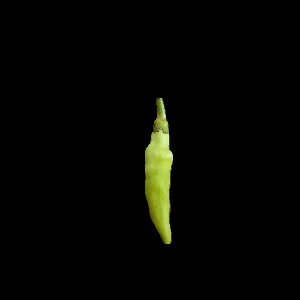

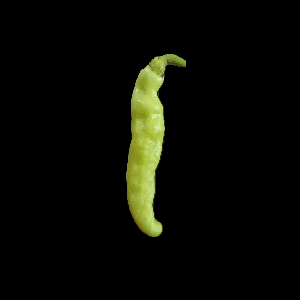

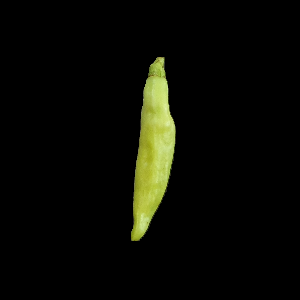

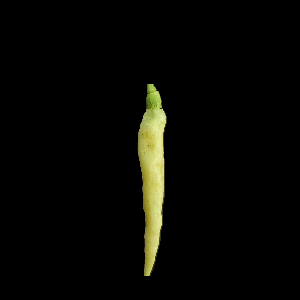

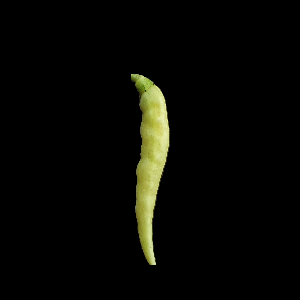

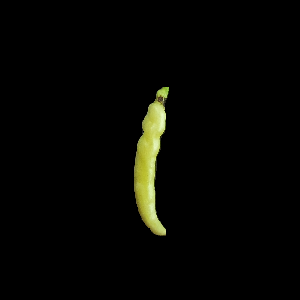

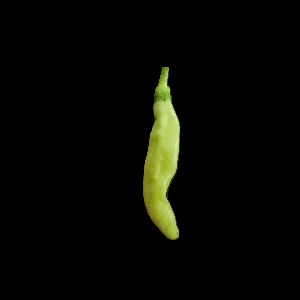

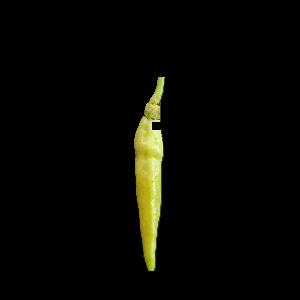

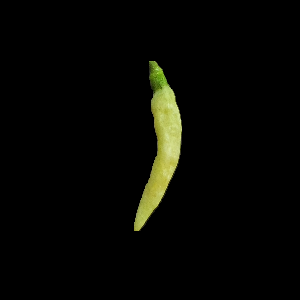

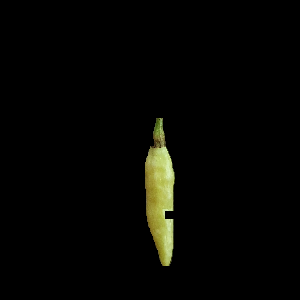

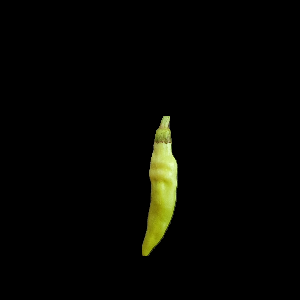

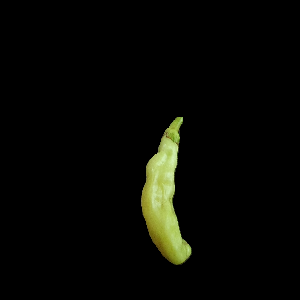

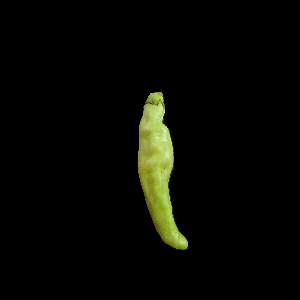

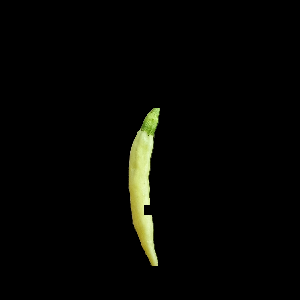

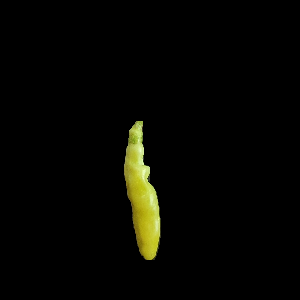

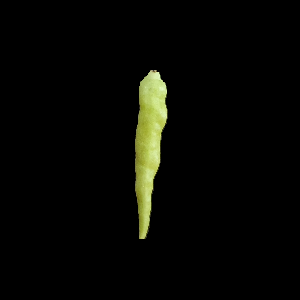

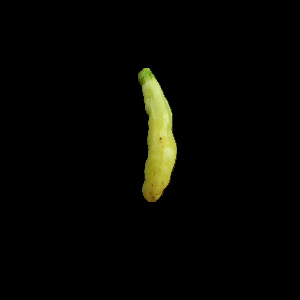

In [ ]:
for i in range(len(hasil_segmentasi_cabai_mentah)):
  cv2_imshow(hasil_segmentasi_cabai_mentah[i])

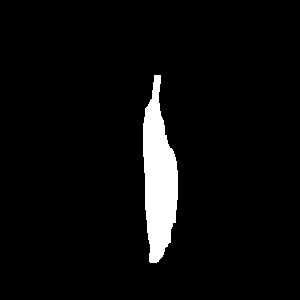

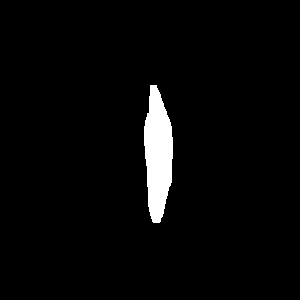

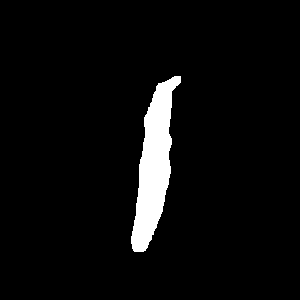

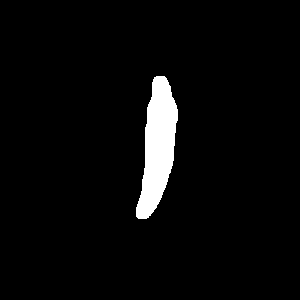

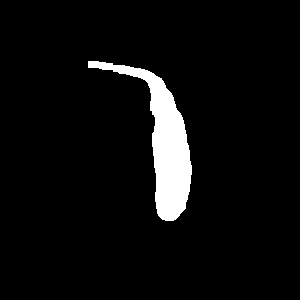

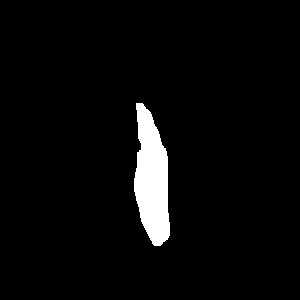

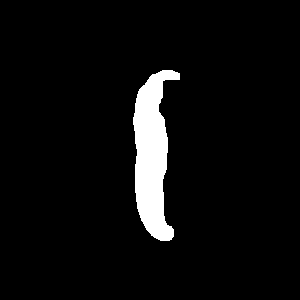

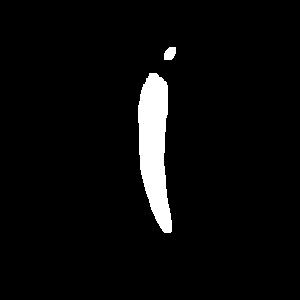

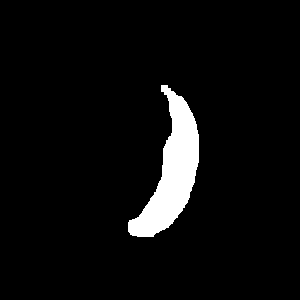

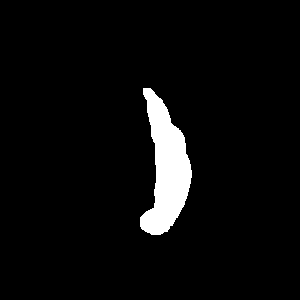

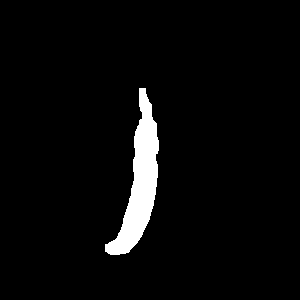

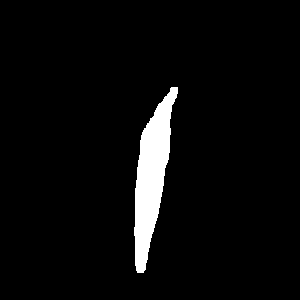

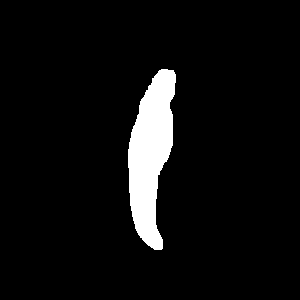

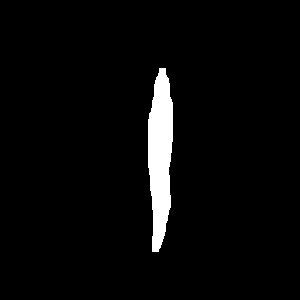

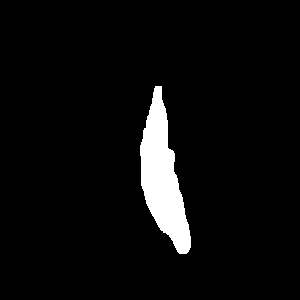

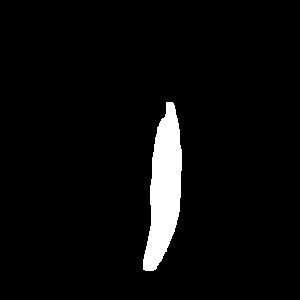

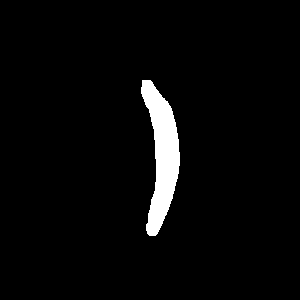

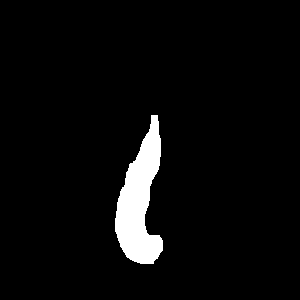

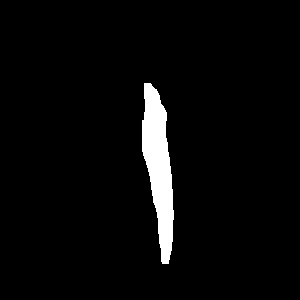

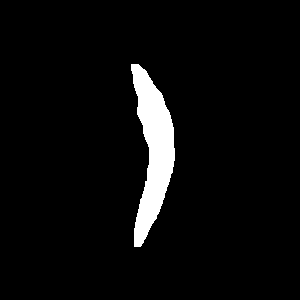

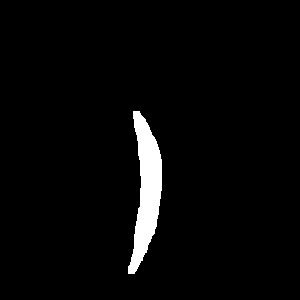

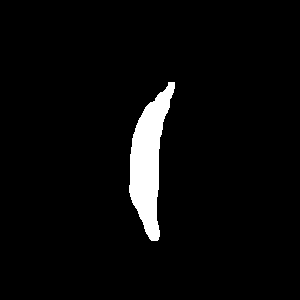

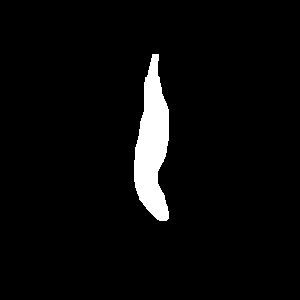

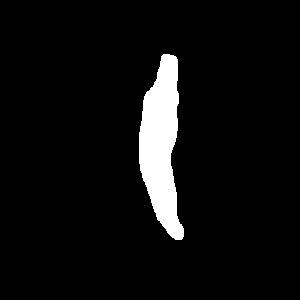

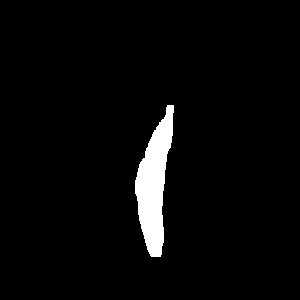

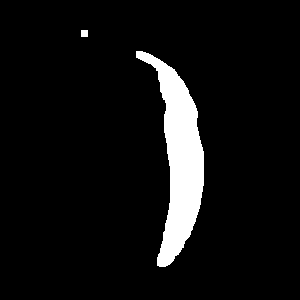

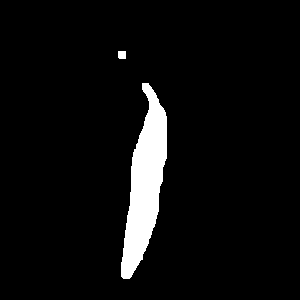

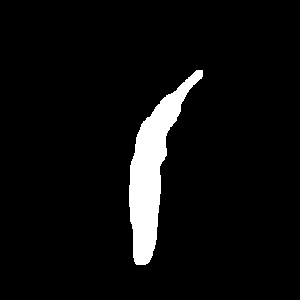

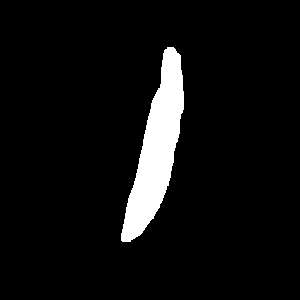

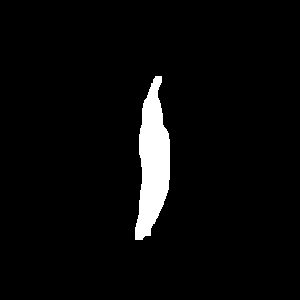

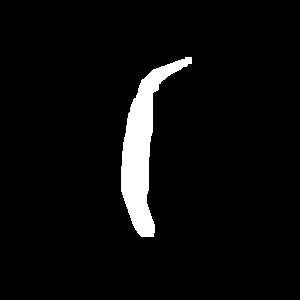

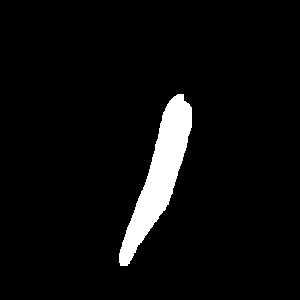

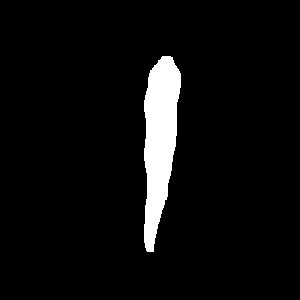

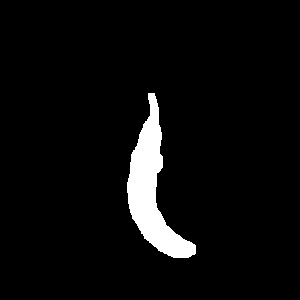

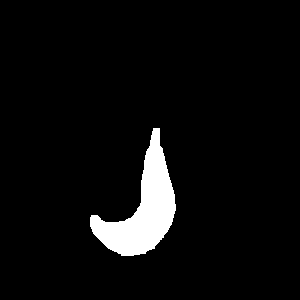

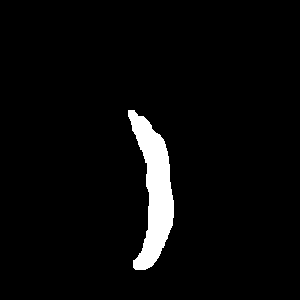

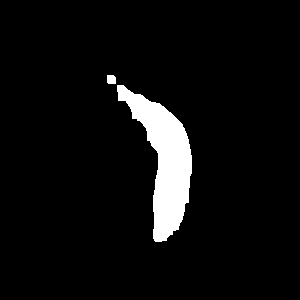

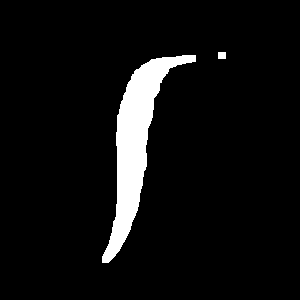

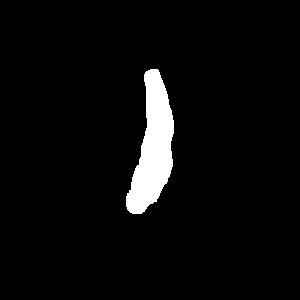

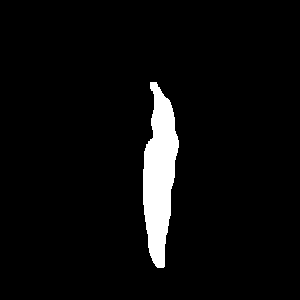

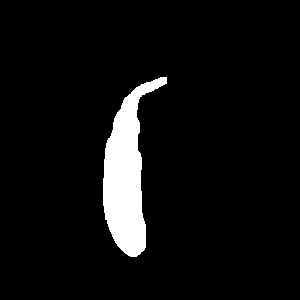

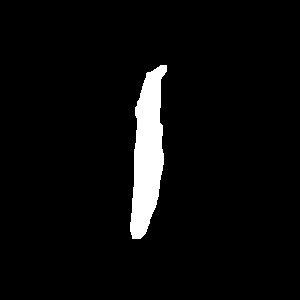

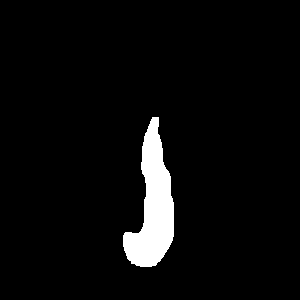

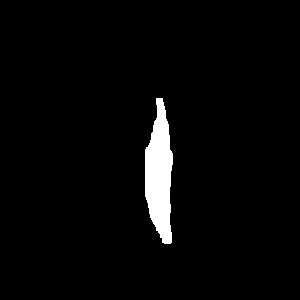

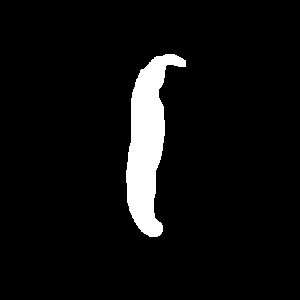

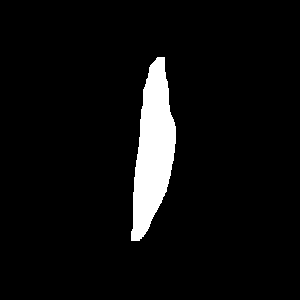

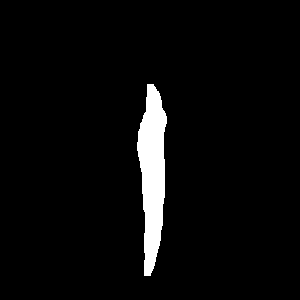

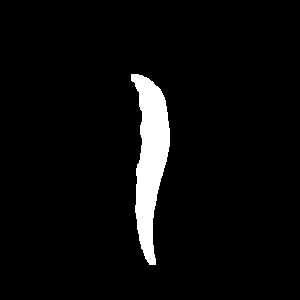

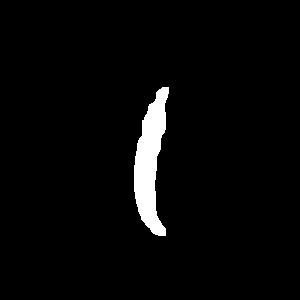

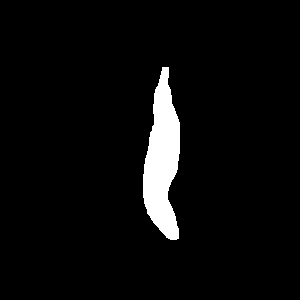

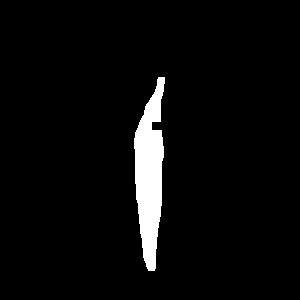

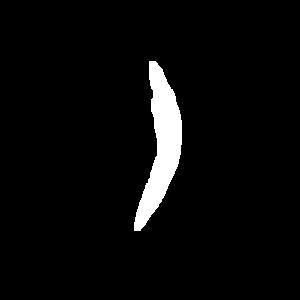

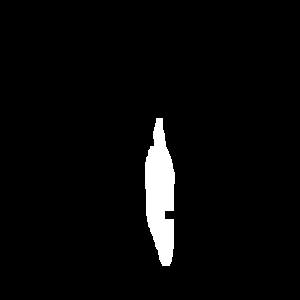

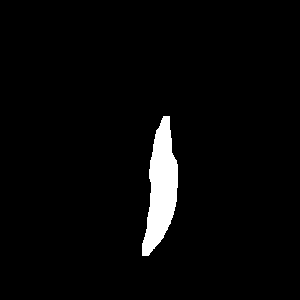

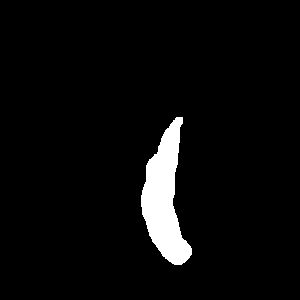

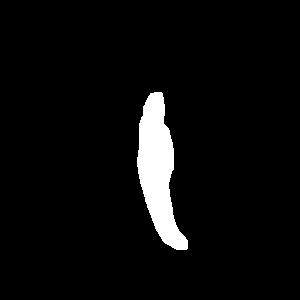

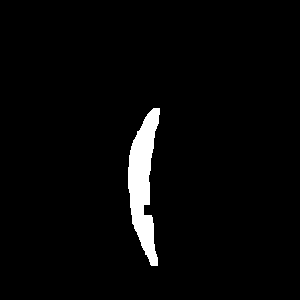

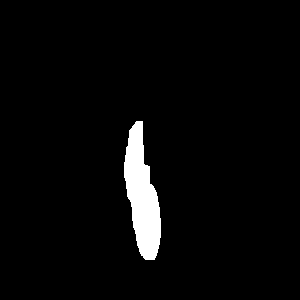

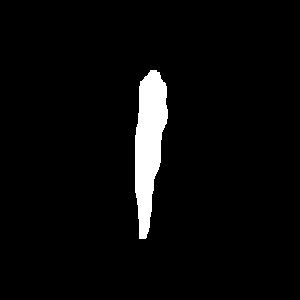

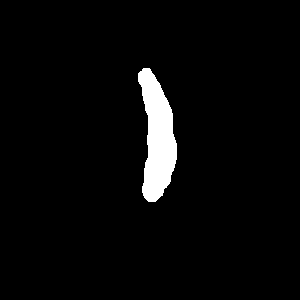

In [ ]:
for i in range(len(hasil_mask_cabai_mentah)):
  cv2_imshow(hasil_mask_cabai_mentah[i])

##### **Menyimpan Hasil Segmentasi dan Thresholding**

In [ ]:
#Menyimpan hasil segmentasi dan threshold cabai matang
for i,img in enumerate(hasil_segmentasi_cabai_matang) :
  cv.imwrite('/content/drive/MyDrive/TubesPCD/Hasil Segmentasi/Cabai Matang/'+'Cabai Matang '+str(i+1)+'.jpg',img)

for i,img in enumerate(hasil_mask_cabai_matang) :
  cv.imwrite('/content/drive/MyDrive/TubesPCD/Hasil Mask/Cabai Matang/'+'Cabai Matang '+str(i+1)+'.jpg',img)

In [ ]:
#Menyimpan hasil segmentasi dan threshold cabai setengah matang
for i,img in enumerate(hasil_segmentasi_cabai_set_matang) :
  cv.imwrite('/content/drive/MyDrive/TubesPCD/Hasil Segmentasi/Cabai Setengah Matang/'+'Cabai Setengah Matang '+str(i+1)+'.jpg',img)

for i,img in enumerate(hasil_mask_cabai_set_matang) :
  cv.imwrite('/content/drive/MyDrive/TubesPCD/Hasil Mask/Cabai Setengah Matang/'+'Cabai Setengah Matang '+str(i+1)+'.jpg',img)

In [ ]:
#Menyimpan hasil segmentasi dan threshold cabai mentah
for i,img in enumerate(hasil_segmentasi_cabai_mentah) :
  cv.imwrite('/content/drive/MyDrive/TubesPCD/Hasil Segmentasi/Cabai Mentah/'+'Cabai Mentah '+str(i+1)+'.jpg',img)

for i,img in enumerate(hasil_mask_cabai_mentah) :
  cv.imwrite('/content/drive/MyDrive/TubesPCD/Hasil Mask/Cabai Mentah/'+'Cabai Mentah '+str(i+1)+'.jpg',img)

#### **Tahap 3.** Tahapan selanjutnya adalah melakukan ekstraksi fitur terhadap nilai tekstur dan warna pada masing-masing citra

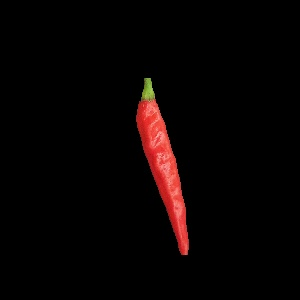

In [ ]:
# Menampilkan salah satu citra cabai matang yang telah disegmentasi
path = '/content/drive/MyDrive/TubesPCD/Hasil Segmentasi/Cabai Matang/Cabai Matang 1.jpg'
img = cv.imread(path)
cv2_imshow(img)

##### **Inisiasi dan Mengambil Citra Cabai**

In [ ]:
#Inisiasi tingkat kematangan cabai
tingkatKematangan = 'Cabai Matang'
# tingkatKematangan = 'Cabai Setengah Matang'
# tingkatKematangan = 'Cabai Mentah'

In [ ]:
#Mengambil citra cabai
list_img_cabai = []
for name in glob.glob("/content/drive/MyDrive/TubesPCD/Hasil Segmentasi/"+tingkatKematangan+"/*.jpg") :
  img_read = cv.imread(name)
  list_img_cabai.append(img_read)

##### **Membuat Fungsi-Fungsi Untuk Mengekstraksi Fitur Tekstur dan Warna**

In [ ]:
#Fungsi untuk mencari fitur nilai tekstur GLCM pada suatu citra
def fiturTekstur(citra, dists=[1], agls=[0], lvl=256, sym=True, norm=True):
  teksturCitra = []

  for img in citra:
    #Mengubah citra RGB menjadi grayscale
    citraGrayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #Mengambil fitur GLCM pada suatu citra
    fiturGLCM = greycomatrix(citraGrayscale, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    teksturCitra.append([greycoprops(fiturGLCM, 'dissimilarity')[0, 0], 
                    greycoprops(fiturGLCM, 'correlation')[0, 0], 
                    greycoprops(fiturGLCM, 'homogeneity')[0, 0], 
                    greycoprops(fiturGLCM, 'contrast')[0, 0], 
                    greycoprops(fiturGLCM, 'ASM')[0, 0],
                    greycoprops(fiturGLCM, 'energy')[0, 0]])
  
  return teksturCitra

In [ ]:
#Fungsi untuk mencari fitur nilai warna HSV pada suatu citra
def fiturWarna(citra):
  warnaCitra = []
  
  for img in citra :
    #Mengubah citra RGB menjadi HSV
    fiturHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    #Split warna hsv
    h,s,v = cv.split(fiturHSV)
    #Mencari nilai hue
    hue = np.average(h)
    #Mencari nilai komponen saturation
    sat = np.average(s)
    #Mencari nilai komponen value
    val = np.average(v)
    #Mencari nilai rata-rata warna hsv pada suatu citra
    meanHSV = np.mean(img)
    #Mencari nilai standar deviasi warna hsv pada suatu citra
    stdHSV = np.std(img)
    warnaCitra.append([hue, sat, val, meanHSV, stdHSV])

  return warnaCitra

##### **Mengekstraksi dan Generate Nilai Fitur Tekstur dan Warna pada Citra Cabai**

In [ ]:
#Fungsi untuk ekstraksi fitur pada suatu citra
def ekstraksiFitur(citraSegmentated, namaLabel) :
  #Memanggil fungsi untuk mencari nilai tekstur GLCM pada citra
  tekstur = fiturTekstur(citraSegmentated)
  #Memanggil fungsi untuk mencari nilai warna HSV pada citra
  warna = fiturWarna(citraSegmentated)
  #Membuat dataframe fitur tekstur
  tekstur_df = pd.DataFrame(tekstur, columns=["Dissimilarity", "Correlation", "Homogeneity", "Contrast", "ASM", "Energy"])
  #Membuat dataframe fitur warna
  warna_df = pd.DataFrame(warna, columns=["Hue", "Saturation", "Value", "Mean HSV", "Standar Deviasi HSV"])
  #Generate final fitur dari data citra
  final_data = pd.concat([tekstur_df, warna_df], axis=1)
  final_data["Label"] = namaLabel

  return final_data

In [ ]:
fiturCabai_df = ekstraksiFitur(list_img_cabai, tingkatKematangan)
fiturCabai_df

,Dissimilarity,Correlation,Homogeneity,Contrast,ASM,Energy,Hue,Saturation,Value,Mean HSV,Standar Deviasi HSV,Label
0,0.799398,0.965082,0.948466,38.098194,0.865006,0.930057,2.667467,15.222111,8.699433,4.778278,27.472114,Cabai Matang
1,0.722854,0.970782,0.946260,31.434158,0.860584,0.927676,2.230289,15.722222,9.281489,4.958637,27.786292,Cabai Matang
2,0.776388,0.967304,0.950641,32.808540,0.876627,0.936284,1.627778,13.780611,8.745256,4.631778,26.939668,Cabai Matang
3,0.752018,0.971943,0.941645,33.571550,0.845631,0.919582,2.249656,17.128478,10.207622,5.489593,29.199863,Cabai Matang
4,0.826265,0.973892,0.936434,33.100156,0.836283,0.914485,2.771856,18.818122,10.923011,5.841226,30.314038,Cabai Matang
5,0.777904,0.977701,0.937618,32.370546,0.840983,0.917051,1.850200,17.358556,11.696533,6.333552,31.709208,Cabai Matang
6,0.719777,0.969839,0.944066,32.623768,0.842661,0.917965,2.891100,18.626878,9.014689,4.872211,27.647804,Cabai Matang
7,0.685708,0.973118,0.947374,30.169208,0.861668,0.928261,1.973922,14.998700,9.158867,4.998022,28.136073,Cabai Matang
8,0.736745,0.972762,0.941825,30.995674,0.844437,0.918932,2.871822,17.857211,10.049911,5.324585,28.991881,Cabai Matang
9,0.697280,0.969492,0.945636,33.984303,0.849602,0.921738,3.272733,17.228967,9.187567,4.972696,28.180468,Cabai Matang


In [ ]:
fiturCabai_df.to_csv("/content/drive/MyDrive/TubesPCD/"+'Fitur '+tingkatKematangan+".csv")

#### **Tahap 4.** Tahapan selanjutnya adalah mengklasifikasikan tingkat kematangan cabai tersebut menggunakan model klasifikasi yang dibentuk dengan algoritma Decision Tree C4.5

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Menginstall beberapa library tambahan
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import graphviz

##### **Preprocessing Data Hasil Ekstraksi Fitur**

In [6]:
#Membaca tiga data hasil ekstraksi fitur
cabaiMatang_df = pd.read_csv("/content/drive/MyDrive/TubesPCD/Fitur Cabai Matang.csv")
cabaiSetMatang_df = pd.read_csv("/content/drive/MyDrive/TubesPCD/Fitur Cabai Setengah Matang.csv")
cabaiMentah_df = pd.read_csv("/content/drive/MyDrive/TubesPCD/Fitur Cabai Mentah.csv")

In [7]:
#Menghubungkan tiga data hasil ekstraksi fitur
dataCabai_df = pd.concat([cabaiMatang_df, cabaiSetMatang_df, cabaiMentah_df])

In [8]:
dataCabai_df

,Unnamed: 0,Dissimilarity,Correlation,Homogeneity,Contrast,ASM,Energy,Hue,Saturation,Value,Mean HSV,Standar Deviasi HSV,Label
0,0,0.799398,0.965082,0.948466,38.098194,0.865006,0.930057,2.667467,15.222111,8.699433,4.778278,27.472114,Cabai Matang
1,1,0.722854,0.970782,0.946260,31.434158,0.860584,0.927676,2.230289,15.722222,9.281489,4.958637,27.786292,Cabai Matang
2,2,0.776388,0.967304,0.950641,32.808540,0.876627,0.936284,1.627778,13.780611,8.745256,4.631778,26.939668,Cabai Matang
3,3,0.752018,0.971943,0.941645,33.571550,0.845631,0.919582,2.249656,17.128478,10.207622,5.489593,29.199863,Cabai Matang
4,4,0.826265,0.973892,0.936434,33.100156,0.836283,0.914485,2.771856,18.818122,10.923011,5.841226,30.314038,Cabai Matang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,55,0.845151,0.975055,0.947280,55.598952,0.868414,0.931887,3.382378,12.890333,7.983522,6.159856,30.258341,Cabai Mentah
56,56,0.865463,0.959929,0.962142,83.919732,0.904124,0.950854,2.435911,8.600722,6.083733,5.029619,29.915536,Cabai Mentah
57,57,0.716388,0.968495,0.960147,58.431193,0.896581,0.946880,2.516533,11.055122,6.208056,4.695463,27.827578,Cabai Mentah
58,58,0.872018,0.969456,0.953928,72.885886,0.882976,0.939668,3.121278,10.915444,7.465144,6.050556,31.623942,Cabai Mentah


In [9]:
#Menghapus kolom yang tidak diperlukan
data = dataCabai_df.drop("Unnamed: 0", axis=1)
data

,Dissimilarity,Correlation,Homogeneity,Contrast,ASM,Energy,Hue,Saturation,Value,Mean HSV,Standar Deviasi HSV,Label
0,0.799398,0.965082,0.948466,38.098194,0.865006,0.930057,2.667467,15.222111,8.699433,4.778278,27.472114,Cabai Matang
1,0.722854,0.970782,0.946260,31.434158,0.860584,0.927676,2.230289,15.722222,9.281489,4.958637,27.786292,Cabai Matang
2,0.776388,0.967304,0.950641,32.808540,0.876627,0.936284,1.627778,13.780611,8.745256,4.631778,26.939668,Cabai Matang
3,0.752018,0.971943,0.941645,33.571550,0.845631,0.919582,2.249656,17.128478,10.207622,5.489593,29.199863,Cabai Matang
4,0.826265,0.973892,0.936434,33.100156,0.836283,0.914485,2.771856,18.818122,10.923011,5.841226,30.314038,Cabai Matang
...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.845151,0.975055,0.947280,55.598952,0.868414,0.931887,3.382378,12.890333,7.983522,6.159856,30.258341,Cabai Mentah
56,0.865463,0.959929,0.962142,83.919732,0.904124,0.950854,2.435911,8.600722,6.083733,5.029619,29.915536,Cabai Mentah
57,0.716388,0.968495,0.960147,58.431193,0.896581,0.946880,2.516533,11.055122,6.208056,4.695463,27.827578,Cabai Mentah
58,0.872018,0.969456,0.953928,72.885886,0.882976,0.939668,3.121278,10.915444,7.465144,6.050556,31.623942,Cabai Mentah


In [10]:
#Mereset urutan dari data
dataCabai = data.copy()
dataCabai = dataCabai.reset_index()
del dataCabai['index']
dataCabai

,Dissimilarity,Correlation,Homogeneity,Contrast,ASM,Energy,Hue,Saturation,Value,Mean HSV,Standar Deviasi HSV,Label
0,0.799398,0.965082,0.948466,38.098194,0.865006,0.930057,2.667467,15.222111,8.699433,4.778278,27.472114,Cabai Matang
1,0.722854,0.970782,0.946260,31.434158,0.860584,0.927676,2.230289,15.722222,9.281489,4.958637,27.786292,Cabai Matang
2,0.776388,0.967304,0.950641,32.808540,0.876627,0.936284,1.627778,13.780611,8.745256,4.631778,26.939668,Cabai Matang
3,0.752018,0.971943,0.941645,33.571550,0.845631,0.919582,2.249656,17.128478,10.207622,5.489593,29.199863,Cabai Matang
4,0.826265,0.973892,0.936434,33.100156,0.836283,0.914485,2.771856,18.818122,10.923011,5.841226,30.314038,Cabai Matang
...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.845151,0.975055,0.947280,55.598952,0.868414,0.931887,3.382378,12.890333,7.983522,6.159856,30.258341,Cabai Mentah
176,0.865463,0.959929,0.962142,83.919732,0.904124,0.950854,2.435911,8.600722,6.083733,5.029619,29.915536,Cabai Mentah
177,0.716388,0.968495,0.960147,58.431193,0.896581,0.946880,2.516533,11.055122,6.208056,4.695463,27.827578,Cabai Mentah
178,0.872018,0.969456,0.953928,72.885886,0.882976,0.939668,3.121278,10.915444,7.465144,6.050556,31.623942,Cabai Mentah


In [11]:
#Mengambil informasi umum dari data
dataCabai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dissimilarity        180 non-null    float64
 1   Correlation          180 non-null    float64
 2   Homogeneity          180 non-null    float64
 3   Contrast             180 non-null    float64
 4   ASM                  180 non-null    float64
 5   Energy               180 non-null    float64
 6   Hue                  180 non-null    float64
 7   Saturation           180 non-null    float64
 8   Value                180 non-null    float64
 9   Mean HSV             180 non-null    float64
 10  Standar Deviasi HSV  180 non-null    float64
 11  Label                180 non-null    object 
dtypes: float64(11), object(1)
memory usage: 17.0+ KB


In [12]:
#Menghitung jumlah data pada suatu label 
dataCabai['Label'].value_counts()

Cabai Matang             60
Cabai Setengah Matang    60
Cabai Mentah             60
Name: Label, dtype: int64

Grafik Korelasi Antar Atribut Data


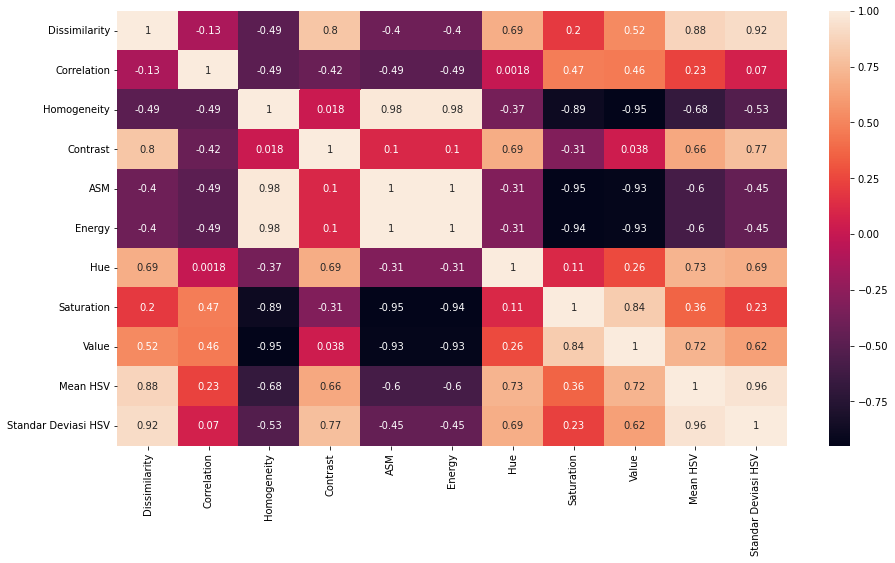

In [13]:
#Menampilkan grafik korelasi antar atribut data
print('Grafik Korelasi Antar Atribut Data')
corrdataCabai = dataCabai.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdataCabai, annot=True)

In [ ]:
dataCabai.to_csv("/content/drive/MyDrive/TubesPCD/"+'Data Cabai Final'+".csv")

##### **Membagi Data Training dan Data Testing**

In [14]:
#Label data
y = dataCabai['Label']
y

0      Cabai Matang
1      Cabai Matang
2      Cabai Matang
3      Cabai Matang
4      Cabai Matang
           ...     
175    Cabai Mentah
176    Cabai Mentah
177    Cabai Mentah
178    Cabai Mentah
179    Cabai Mentah
Name: Label, Length: 180, dtype: object

In [15]:
#Data training
X = dataCabai.drop(['Label'], axis=1)
X

,Dissimilarity,Correlation,Homogeneity,Contrast,ASM,Energy,Hue,Saturation,Value,Mean HSV,Standar Deviasi HSV
0,0.799398,0.965082,0.948466,38.098194,0.865006,0.930057,2.667467,15.222111,8.699433,4.778278,27.472114
1,0.722854,0.970782,0.946260,31.434158,0.860584,0.927676,2.230289,15.722222,9.281489,4.958637,27.786292
2,0.776388,0.967304,0.950641,32.808540,0.876627,0.936284,1.627778,13.780611,8.745256,4.631778,26.939668
3,0.752018,0.971943,0.941645,33.571550,0.845631,0.919582,2.249656,17.128478,10.207622,5.489593,29.199863
4,0.826265,0.973892,0.936434,33.100156,0.836283,0.914485,2.771856,18.818122,10.923011,5.841226,30.314038
...,...,...,...,...,...,...,...,...,...,...,...
175,0.845151,0.975055,0.947280,55.598952,0.868414,0.931887,3.382378,12.890333,7.983522,6.159856,30.258341
176,0.865463,0.959929,0.962142,83.919732,0.904124,0.950854,2.435911,8.600722,6.083733,5.029619,29.915536
177,0.716388,0.968495,0.960147,58.431193,0.896581,0.946880,2.516533,11.055122,6.208056,4.695463,27.827578
178,0.872018,0.969456,0.953928,72.885886,0.882976,0.939668,3.121278,10.915444,7.465144,6.050556,31.623942


In [16]:
#Membagi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)

In [17]:
#Menampilkan ukuran data training dan data testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 11)
(45, 11)
(135,)
(45,)


In [18]:
#Mendefinisikan kolom data
X.columns = ['Dissimilarity', 'Correlation', 'Homogeneity', 'Contrast', 'ASM', 'Energy', 'Hue', 'Saturation', 'Value', 'Mean HSV', 'Standar Deviasi HSV']
y.columns = ['Cabai Matang', 'Cabai Setengah Matang', 'Cabai Mentah']

##### **Membuat Model Klasifikasi Menggunakan Algoritma Decision Tree C4.5**

In [19]:
modelDT = DecisionTreeClassifier(random_state=100)

In [20]:
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

#### **Tahap 5.** Tahapan selanjutnya adalah mengevaluasi model klasifikasi tersebut menggunakan data tingkat kematangan cabai

##### **Tahapan Pengujian dan Evaluasi Model Klasifikasi**

In [21]:
#Menguji model dengan data testing
y_pred = modelDT.predict(X_test)

Confusion Matrix :


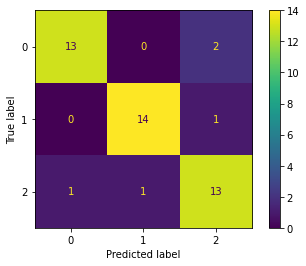

In [25]:
#Menampilkan confusion matrix
c_matrix = np.array(confusion_matrix(y_test, y_pred))
print('Confusion Matrix :')
ConfusionMatrixDisplay(c_matrix).plot()

In [26]:
#Menampilkan classification report
c_report = classification_report(y_test, y_pred)
print('Classification Report :')
print(c_report)

Classification Report :
                       precision    recall  f1-score   support

         Cabai Matang       0.93      0.87      0.90        15
         Cabai Mentah       0.93      0.93      0.93        15
Cabai Setengah Matang       0.81      0.87      0.84        15

             accuracy                           0.89        45
            macro avg       0.89      0.89      0.89        45
         weighted avg       0.89      0.89      0.89        45



In [27]:
#Menampilkan nilai akurasi dari proses pengujian dengan metode 5-fold cross validation
print('Nilai Akurasi dari Masing-Masing Fold')
accuracyValue = cross_val_score(modelDT, X, y, cv=5)
print(accuracyValue)
print('Nilai Akurasi Rata-Rata dari Masing-Masing Fold')
accuracyMean = accuracyValue.mean()
print(accuracyMean)

Nilai Akurasi dari Masing-Masing Fold
[0.91666667 0.94444444 0.91666667 0.86111111 0.80555556]
Nilai Akurasi Rata-Rata dari Masing-Masing Fold
0.888888888888889


##### **Menampilkan Decision Tree**

Bentuk Pohon Decision Tree
None


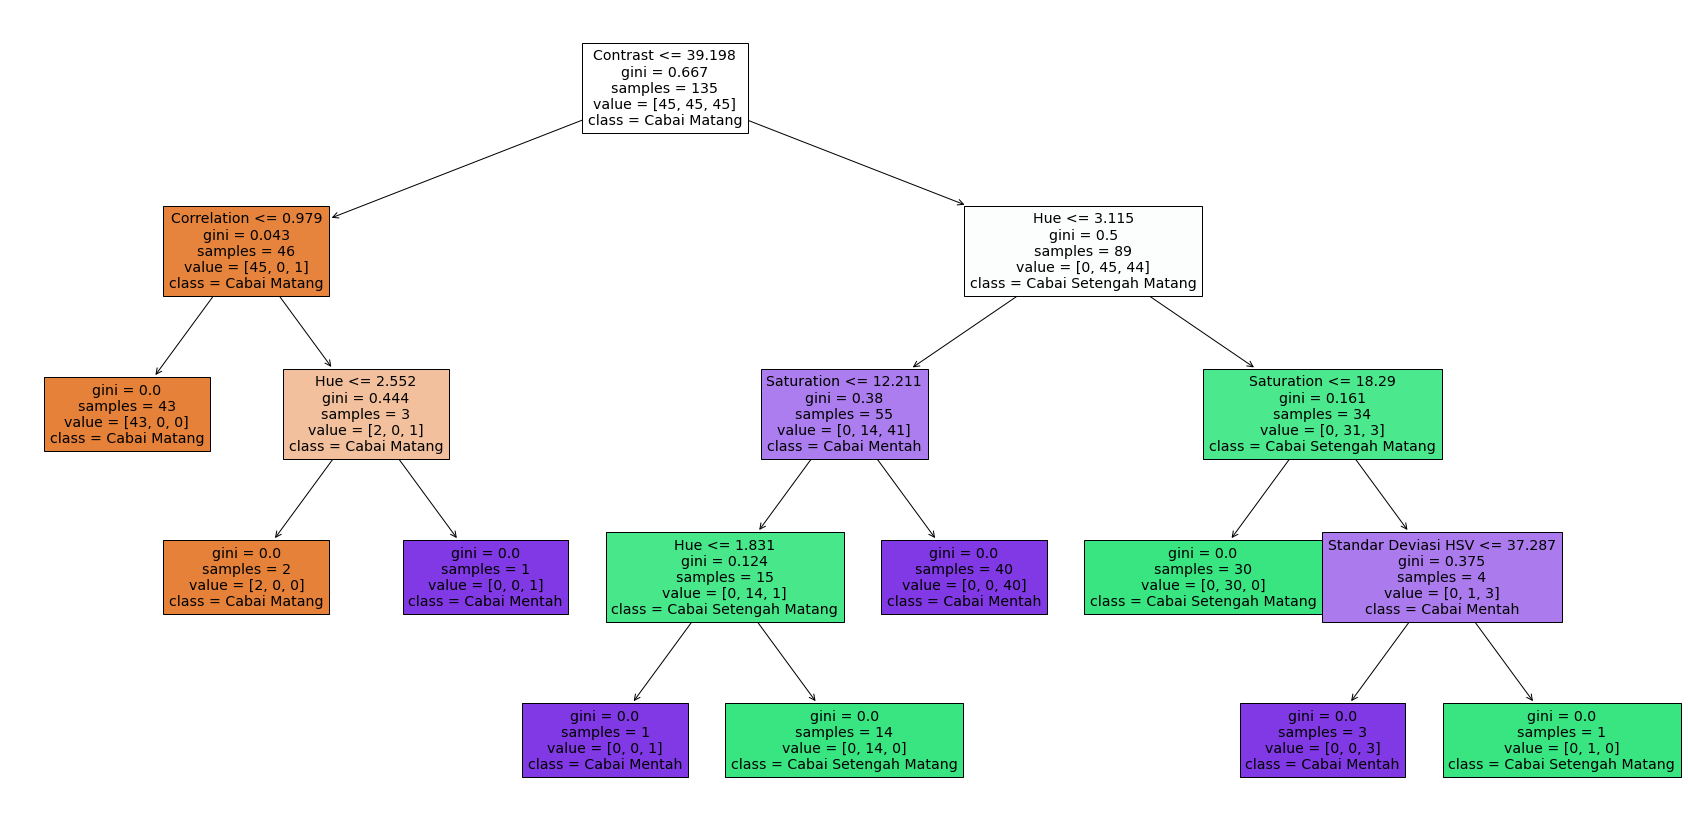

In [28]:
#Menampilkan decision tree berdasarkan model klasifikasi yang dibentuk
print('Bentuk Pohon Decision Tree')
treeFigure = plt.figure(figsize=(30,15))
tree.plot_tree(modelDT, feature_names=X.columns, class_names=y.columns, filled=True)
print(treeFigure.show())

In [ ]:
#Menampilkan decision tree dalam bentuk PDF
dataFigure = tree.export_graphviz(modelDT, out_file=None, feature_names=X.columns, class_names=y.columns, filled=True)
graphFigure = graphviz.Source(dataFigure)
graphFigure.view()

'Source.gv.pdf'